In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
data = pd.read_csv('all_stocks_5yr.csv', parse_dates=True)

In [4]:
sbux = data[data['Name'] == 'SBUX'].copy()
sbux

date    open    high     low   close    volume  Name
498152  2013-02-08  27.920  28.325  27.920  28.185   7146296  SBUX
498153  2013-02-11  28.260  28.260  27.930  28.070   5457354  SBUX
498154  2013-02-12  28.000  28.275  27.975  28.130   8665592  SBUX
498155  2013-02-13  28.230  28.230  27.750  27.915   7022056  SBUX
498156  2013-02-14  27.765  27.905  27.675  27.775   8899188  SBUX
...            ...     ...     ...     ...     ...       ...   ...
499406  2018-02-01  56.280  56.420  55.890  56.000  14690146  SBUX
499407  2018-02-02  55.900  56.320  55.700  55.770  15358909  SBUX
499408  2018-02-05  55.530  56.260  54.570  54.690  16059955  SBUX
499409  2018-02-06  53.685  56.060  53.560  55.610  17415065  SBUX
499410  2018-02-07  55.080  55.430  54.440  54.460  13927022  SBUX

[1259 rows x 7 columns]

<Axes: >

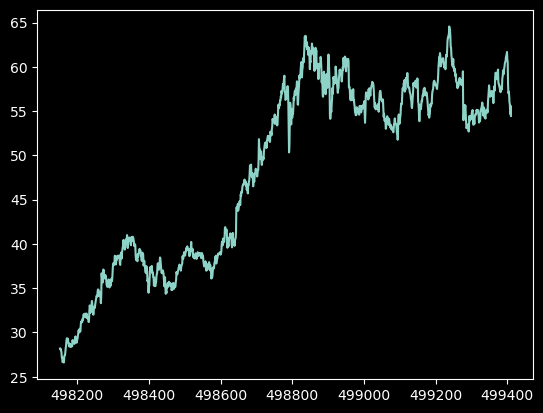

In [5]:
sbux['close'].plot()

In [6]:
sbux['prev_close'] = sbux['close'].shift(1)

In [7]:
sbux.head()

date    open    high     low   close   volume  Name  prev_close
498152  2013-02-08  27.920  28.325  27.920  28.185  7146296  SBUX         NaN
498153  2013-02-11  28.260  28.260  27.930  28.070  5457354  SBUX      28.185
498154  2013-02-12  28.000  28.275  27.975  28.130  8665592  SBUX      28.070
498155  2013-02-13  28.230  28.230  27.750  27.915  7022056  SBUX      28.130
498156  2013-02-14  27.765  27.905  27.675  27.775  8899188  SBUX      27.915

In [8]:
sbux['return'] = sbux['close'] / sbux['prev_close'] - 1

In [9]:
sbux.head()

date    open    high     low   close   volume  Name  prev_close  \
498152  2013-02-08  27.920  28.325  27.920  28.185  7146296  SBUX         NaN   
498153  2013-02-11  28.260  28.260  27.930  28.070  5457354  SBUX      28.185   
498154  2013-02-12  28.000  28.275  27.975  28.130  8665592  SBUX      28.070   
498155  2013-02-13  28.230  28.230  27.750  27.915  7022056  SBUX      28.130   
498156  2013-02-14  27.765  27.905  27.675  27.775  8899188  SBUX      27.915   

          return  
498152       NaN  
498153 -0.004080  
498154  0.002138  
498155 -0.007643  
498156 -0.005015

In [10]:
sbux['return2'] =  sbux['close'].pct_change()

In [11]:
sbux

date    open    high     low   close    volume  Name  \
498152  2013-02-08  27.920  28.325  27.920  28.185   7146296  SBUX   
498153  2013-02-11  28.260  28.260  27.930  28.070   5457354  SBUX   
498154  2013-02-12  28.000  28.275  27.975  28.130   8665592  SBUX   
498155  2013-02-13  28.230  28.230  27.750  27.915   7022056  SBUX   
498156  2013-02-14  27.765  27.905  27.675  27.775   8899188  SBUX   
...            ...     ...     ...     ...     ...       ...   ...   
499406  2018-02-01  56.280  56.420  55.890  56.000  14690146  SBUX   
499407  2018-02-02  55.900  56.320  55.700  55.770  15358909  SBUX   
499408  2018-02-05  55.530  56.260  54.570  54.690  16059955  SBUX   
499409  2018-02-06  53.685  56.060  53.560  55.610  17415065  SBUX   
499410  2018-02-07  55.080  55.430  54.440  54.460  13927022  SBUX   

        prev_close    return   return2  
498152         NaN       NaN       NaN  
498153      28.185 -0.004080 -0.004080  
498154      28.070  0.002138  0.002138  
498155      28.130 -0.007643 -0.007643  
498156      27.915 -0.005015 -0.005015  
...            ...       ...       ...  
499406      56.810 -0.014258 -0.014258  
499407      56.000 -0.004107 -0.004107  
499408      55.770 -0.019365 -0.019365  
499409      54.690  0.016822  0.016822  
499410      55.610 -0.020680 -0.020680  

[1259 rows x 10 columns]

<Axes: >

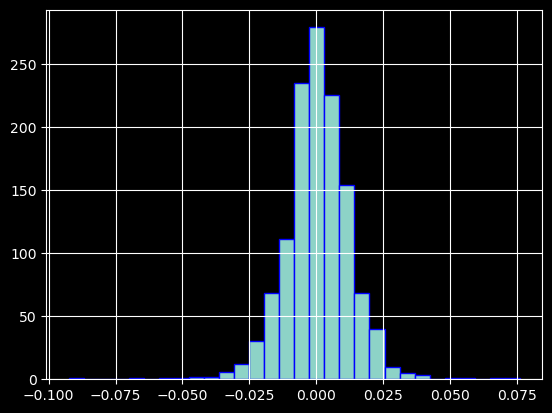

In [12]:
sbux['return'].hist(bins=30, edgecolor='b')

In [13]:
sbux['return'].mean(), sbux['return'].std()

(0.0006002332205830914, 0.012360934026133882)

In [14]:
sbux['log_return'] = np.log(sbux['return'] + 1)

In [15]:
sbux

date    open    high     low   close    volume  Name  \
498152  2013-02-08  27.920  28.325  27.920  28.185   7146296  SBUX   
498153  2013-02-11  28.260  28.260  27.930  28.070   5457354  SBUX   
498154  2013-02-12  28.000  28.275  27.975  28.130   8665592  SBUX   
498155  2013-02-13  28.230  28.230  27.750  27.915   7022056  SBUX   
498156  2013-02-14  27.765  27.905  27.675  27.775   8899188  SBUX   
...            ...     ...     ...     ...     ...       ...   ...   
499406  2018-02-01  56.280  56.420  55.890  56.000  14690146  SBUX   
499407  2018-02-02  55.900  56.320  55.700  55.770  15358909  SBUX   
499408  2018-02-05  55.530  56.260  54.570  54.690  16059955  SBUX   
499409  2018-02-06  53.685  56.060  53.560  55.610  17415065  SBUX   
499410  2018-02-07  55.080  55.430  54.440  54.460  13927022  SBUX   

        prev_close    return   return2  log_return  
498152         NaN       NaN       NaN         NaN  
498153      28.185 -0.004080 -0.004080   -0.004089  
498154      28.070  0.002138  0.002138    0.002135  
498155      28.130 -0.007643 -0.007643   -0.007672  
498156      27.915 -0.005015 -0.005015   -0.005028  
...            ...       ...       ...         ...  
499406      56.810 -0.014258 -0.014258   -0.014361  
499407      56.000 -0.004107 -0.004107   -0.004116  
499408      55.770 -0.019365 -0.019365   -0.019555  
499409      54.690  0.016822  0.016822    0.016682  
499410      55.610 -0.020680 -0.020680   -0.020897  

[1259 rows x 11 columns]

<Axes: >

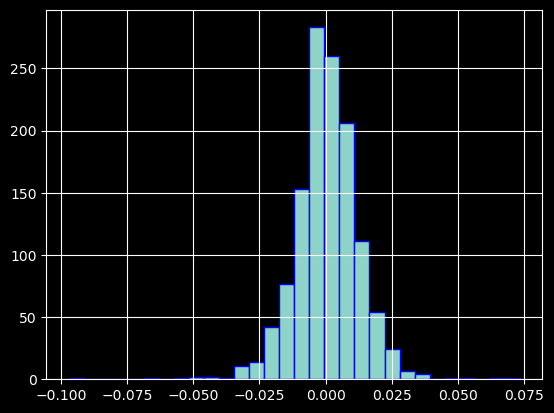

In [16]:
sbux['log_return'].hist(bins=30, edgecolor='b')

In [17]:
sbux['log_return'].mean(), sbux['return'].std()

(0.0005235902748108682, 0.012360934026133882)

In [18]:
from scipy.stats import norm

In [19]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100
)

In [20]:
y_list = norm.pdf(x_list, loc=sbux['return'].mean(), scale=sbux['return'].std())

<Axes: >

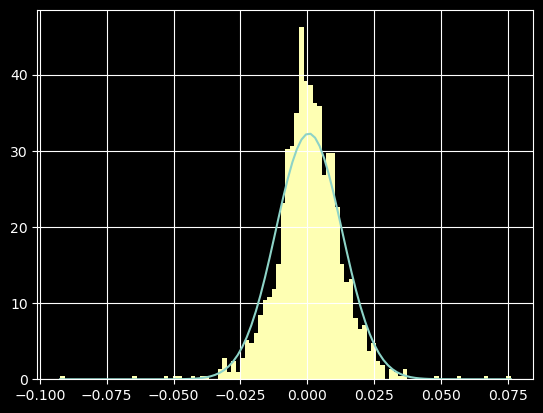

In [21]:
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True)

In [22]:
from scipy.stats import probplot

((array([-3.26318411, -3.00291115, -2.85798028, ...,  2.85798028,
          3.00291115,  3.26318411]),
  array([-0.09243697, -0.06519128, -0.05321627, ...,  0.05617538,
          0.06623157,  0.0761332 ])),
 (0.012069021175478518, 0.0006002332205830934, 0.9745536080830219))

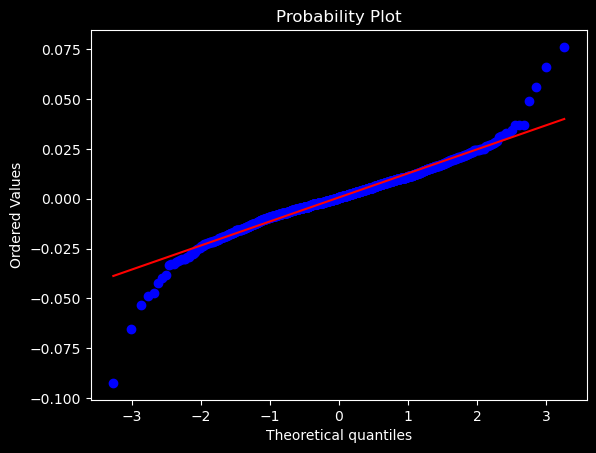

In [23]:
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt)

In [24]:
import statsmodels.api as sm

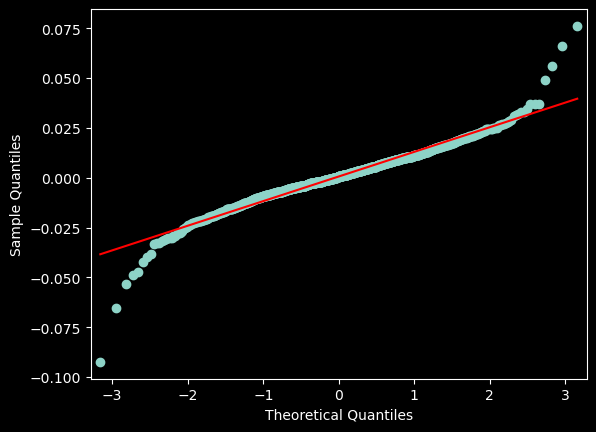

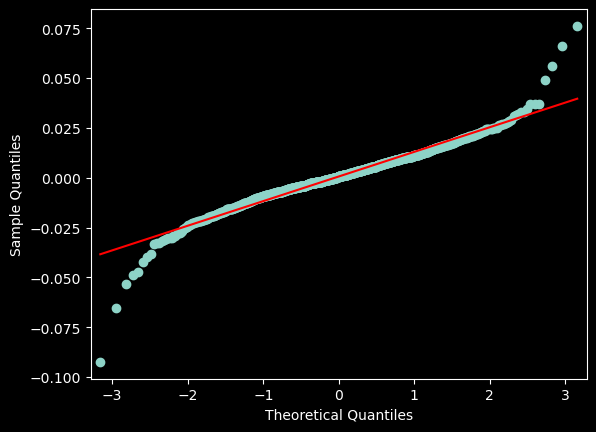

In [25]:
sm.qqplot(sbux['return'].dropna(), line='s')

In [26]:
from scipy.stats import t

In [27]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100
)

In [28]:
params = t.fit(sbux['return'].dropna())

In [29]:
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [30]:
df, loc, scale = params

In [31]:
y_list = t.pdf(x_list, df, loc, scale)

<Axes: >

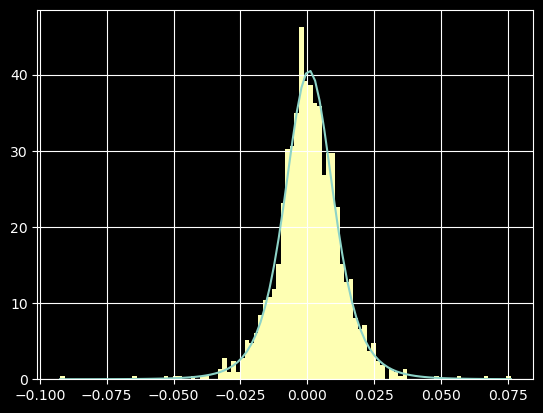

In [32]:
plt.plot(x_list, y_list)
sbux['return'].hist(bins=100, density=True)

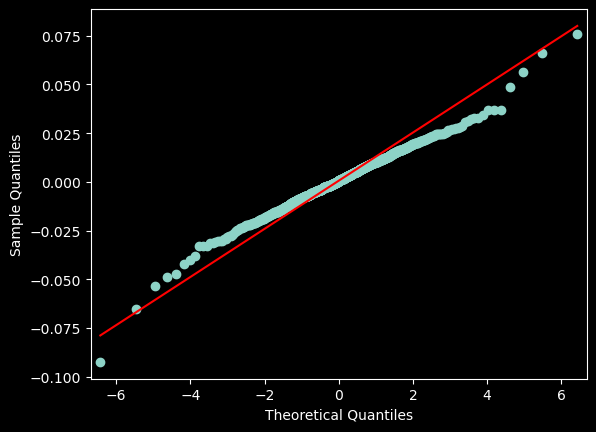

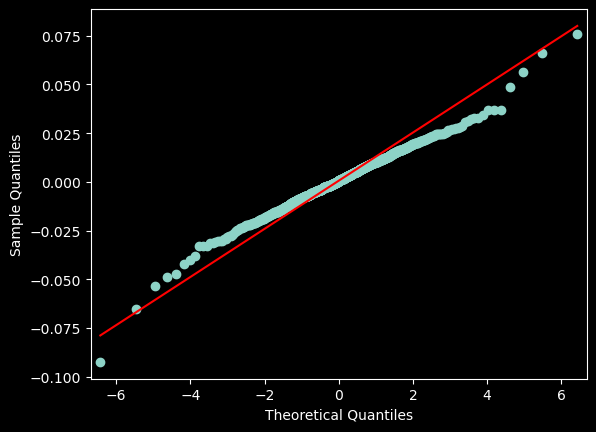

In [33]:
class myt:
    def __init__(self, df):
        self.df = df

    def fit(self, x):
        return t.fit(x)

    def ppf(self, x, loc=0, scale=1):
        return t.ppf(x, self.df, loc, scale)

sm.qqplot(sbux['return'].dropna(), dist=myt(df), line='s')

In [34]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100
)

In [35]:
params = t.fit(sbux['log_return'].dropna())

In [36]:
df, loc, scale = params

In [37]:
y_list = t.pdf(x_list, df, loc, scale)

<Axes: >

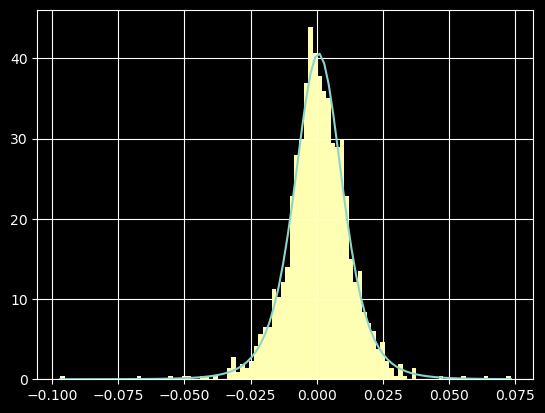

In [38]:
plt.plot(x_list, y_list)
sbux['log_return'].hist(bins=100, density=True)

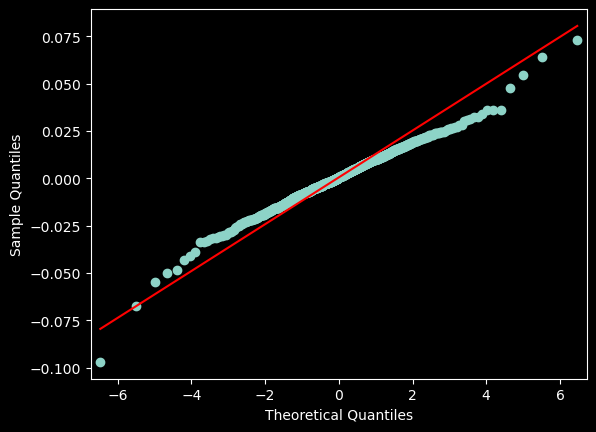

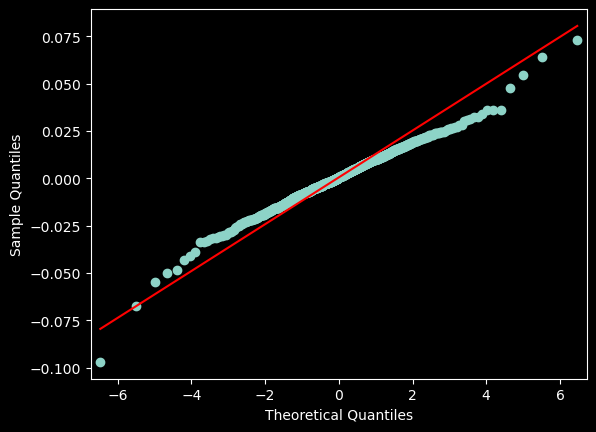

In [39]:
class myt:
    def __init__(self, df):
        self.df = df

    def fit(self, x):
        return t.fit(x)

    def ppf(self, x, loc=0, scale=1):
        return t.ppf(x, self.df, loc, scale)

sm.qqplot(sbux['log_return'].dropna(), dist=myt(df), line='s')

Confidence Interval

In [40]:
values = sbux['return'].dropna().to_numpy()

In [41]:
m = values.mean()
s = values.std()

In [42]:
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

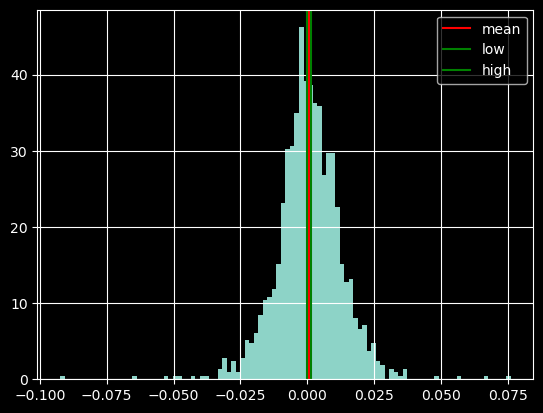

In [43]:
sbux['return'].hist(bins=100, density=True)
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.legend()

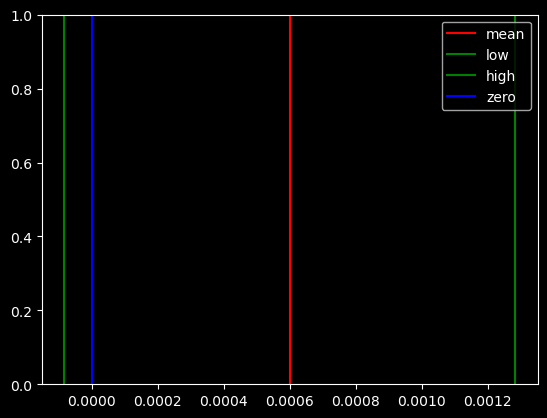

In [44]:
plt.axvline(m, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='green')
plt.axvline(0, label='zero', color='blue')
plt.legend()

In [45]:
from scipy.stats import jarque_bera, normaltest

In [46]:
jarque_bera(values)

SignificanceResult(statistic=1639.028438655224, pvalue=0.0)

In [47]:
normaltest(values)

NormaltestResult(statistic=172.6819672061636, pvalue=3.1811727900119636e-38)

In [48]:
jarque_bera(sbux['log_return'].dropna())

SignificanceResult(statistic=1882.1814629047703, pvalue=0.0)

In [49]:
normaltest(sbux['log_return'].dropna())

NormaltestResult(statistic=198.54738937007733, pvalue=7.690989175882069e-44)

In [50]:
from scipy.stats import kstest

In [51]:
df, loc, scale = t.fit(values)

def cdf(x):
    return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=0.01887566203844726, pvalue=0.7537785475444063, statistic_location=-0.0003257859586252021, statistic_sign=1)

In [52]:
df, loc, scale = t.fit(sbux['log_return'].dropna())
def cdf(x):
    return t.cdf(x, df, loc, scale)

kstest(values, cdf)

KstestResult(statistic=0.018377769605553596, pvalue=0.7819492804308994, statistic_location=-0.0003257859586252021, statistic_sign=1)

Covariance and Correlation

In [53]:
close = pd.read_csv('sp500_close.csv')

In [54]:
test = pd.DataFrame()
test['names'] = close.columns
test

names
0    Unnamed: 0
1           AAL
2          AAPL
3           AAP
4          ABBV
..          ...
501         XYL
502         YUM
503         ZBH
504        ZION
505         ZTS

[506 rows x 1 columns]

975

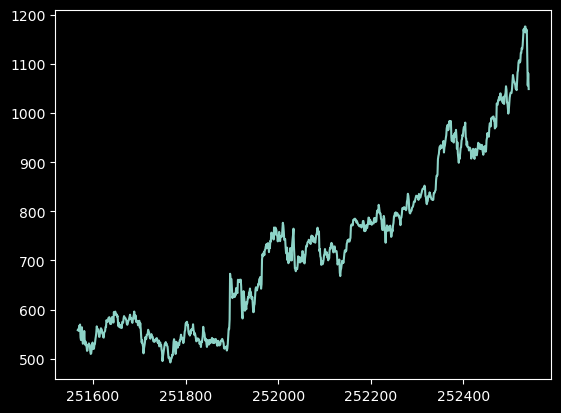

In [55]:
goog = data[data['Name'] == 'GOOG']
goog['close'].plot()
len(goog)

In [56]:
symbols = ['AAPL', 'GOOG', 'IBM', 'NFLX', 'SBUX']
sub = close[symbols].copy()

In [57]:
sub.dropna(axis=0, how='all', inplace=True)

In [58]:
sub

AAPL     GOOG     IBM      NFLX    SBUX
0      67.8542      NaN  201.68   25.8528  28.185
3      68.5614      NaN  200.16   25.4128  28.070
4      66.8428      NaN  200.04   25.4214  28.130
5      66.7156      NaN  200.09   26.6098  27.915
6      66.6556      NaN  199.65   26.7714  27.775
...        ...      ...     ...       ...     ...
1819  167.7800  1167.70  162.40  265.0700  56.000
1820  160.5000  1111.90  159.03  267.4300  55.770
1823  156.4900  1055.80  152.53  254.2600  54.690
1824  163.0300  1080.60  155.34  265.7200  55.610
1825  159.5400  1048.58  153.85  264.5600  54.460

[1259 rows x 5 columns]

In [59]:
for symbol in symbols:
    sub[symbol + '_prev'] = sub[symbol].shift(1)
    sub[symbol + '_ret'] = sub[symbol] / sub[symbol + '_prev'] - 1

In [60]:
rets = sub[[symbol + '_ret' for symbol in symbols]].copy()

In [61]:
rets

AAPL_ret  GOOG_ret   IBM_ret  NFLX_ret  SBUX_ret
0          NaN       NaN       NaN       NaN       NaN
3     0.010422       NaN -0.007537 -0.017019 -0.004080
4    -0.025067       NaN -0.000600  0.000338  0.002138
5    -0.001903       NaN  0.000250  0.046748 -0.007643
6    -0.000899       NaN -0.002199  0.006073 -0.005015
...        ...       ...       ...       ...       ...
1819  0.002090 -0.001915 -0.007941 -0.019349 -0.014258
1820 -0.043390 -0.047786 -0.020751  0.008903 -0.004107
1823 -0.024984 -0.050454 -0.040873 -0.049247 -0.019365
1824  0.041792  0.023489  0.018423  0.045072  0.016822
1825 -0.021407 -0.029632 -0.009592 -0.004365 -0.020680

[1259 rows x 5 columns]

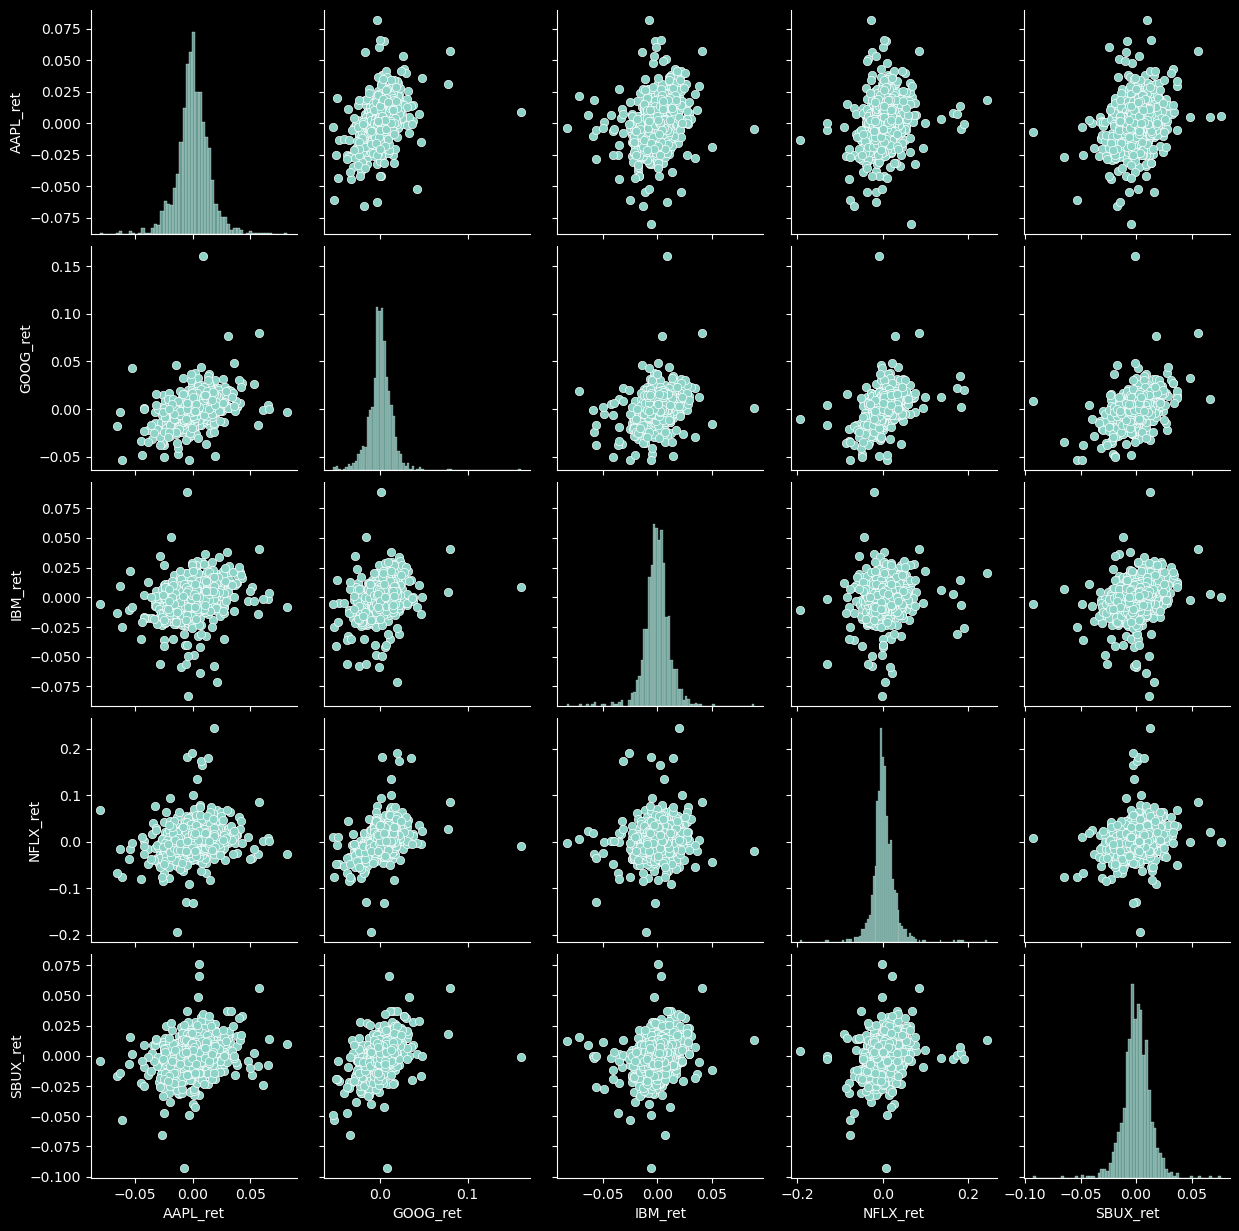

In [62]:
import seaborn as sns
sns.pairplot(rets)

In [63]:
rets.mean()

AAPL_ret    0.000786
GOOG_ret    0.000745
IBM_ret    -0.000144
NFLX_ret    0.002217
SBUX_ret    0.000600
dtype: float64

In [64]:
rets.std()

AAPL_ret    0.014593
GOOG_ret    0.014069
IBM_ret     0.011876
NFLX_ret    0.027353
SBUX_ret    0.012361
dtype: float64

Text(0, 0.5, 'Returns')

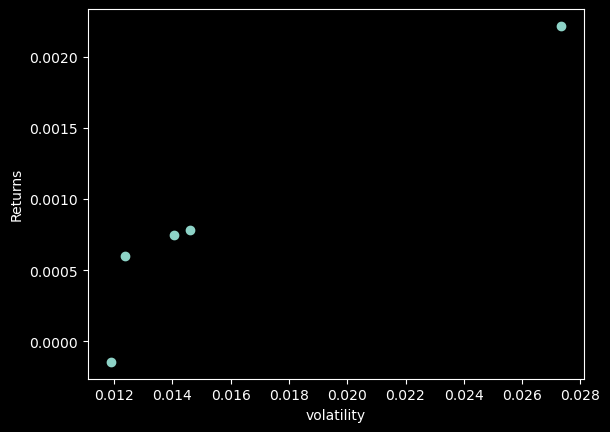

In [65]:
plt.scatter(rets.std(), rets.mean())
plt.xlabel('volatility')
plt.ylabel('Returns')

<Axes: >

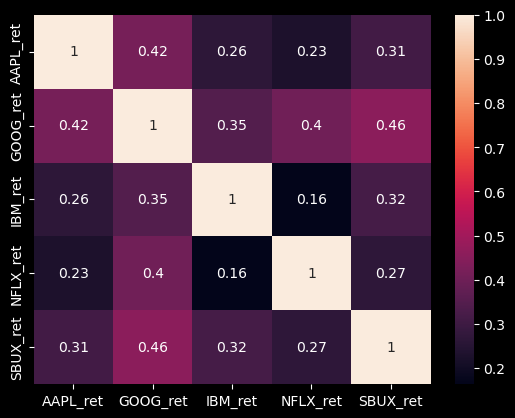

In [66]:
corr_matrix = rets.corr()
sns.heatmap(corr_matrix, annot=True)

<Axes: >

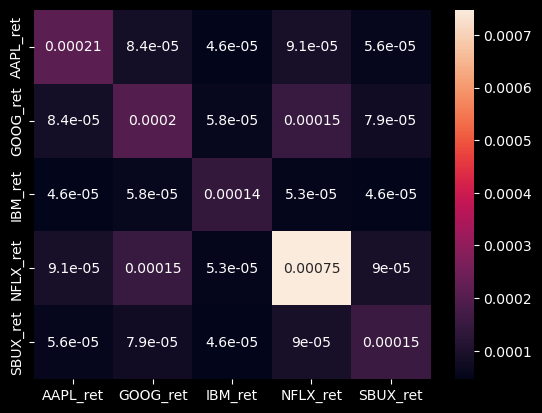

In [67]:
cov_matrix = rets.cov()
sns.heatmap(cov_matrix, annot=True)

Alpha And Beta

In [68]:
spy = pd.read_csv('SPY.csv', index_col=0, parse_dates=True)
spy.head()

Open        High         Low       Close  Adj Close  \
Date                                                                    
2010-01-04  112.370003  113.389999  111.510002  113.330002  92.246048   
2010-01-05  113.260002  113.680000  112.849998  113.629997  92.490204   
2010-01-06  113.519997  113.989998  113.430000  113.709999  92.555328   
2010-01-07  113.500000  114.330002  113.180000  114.190002  92.946060   
2010-01-08  113.889999  114.620003  113.660004  114.570000  93.255348   

               Volume  
Date                   
2010-01-04  118944600  
2010-01-05  111579900  
2010-01-06  116074400  
2010-01-07  131091100  
2010-01-08  126402800

In [69]:
spy['SPY'] = spy['Close'].pct_change()

In [70]:
index = pd.read_csv('sp500sub.csv', index_col=0, parse_dates=True)
index.head()

Open   High    Low  Close  Adj Close     Volume  Name
Date                                                              
2010-01-04   9.22   9.51   9.17   9.50       9.50  1865400.0  INCY
2010-01-05   9.51  10.29   9.45  10.27      10.27  7608900.0  INCY
2010-01-06  10.38  11.09  10.35  11.00      11.00  8046700.0  INCY
2010-01-07  11.00  11.06  10.62  10.82      10.82  3680300.0  INCY
2010-01-08  10.82  11.00  10.75  10.94      10.94  1529300.0  INCY

In [71]:
aapl = index[index['Name'] == 'AAPL'].copy()

In [72]:
aapl['AAPL'] = aapl['Close'].pct_change()

In [73]:
joined = aapl[['AAPL']].join(spy['SPY'])

In [74]:
joined.head()

AAPL       SPY
Date                          
2010-01-04       NaN       NaN
2010-01-05  0.001729  0.002647
2010-01-06 -0.015906  0.000704
2010-01-07 -0.001849  0.004221
2010-01-08  0.006648  0.003328

<Axes: xlabel='Date'>

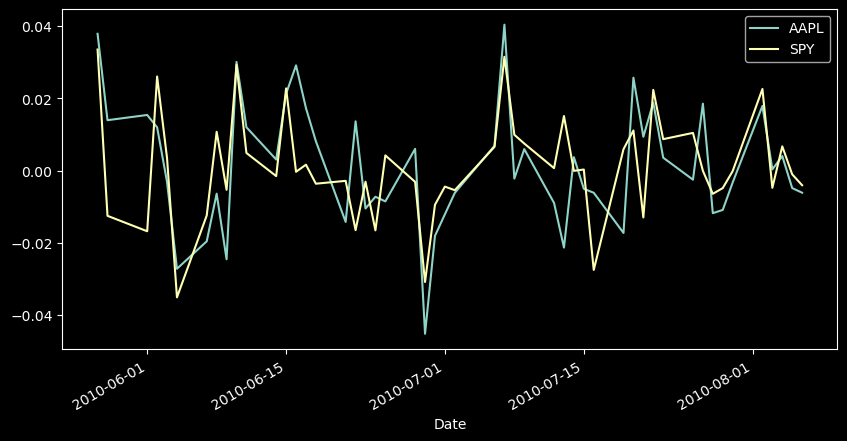

In [75]:
joined.iloc[100:150].plot(figsize=(10,5))

In [76]:
joined.dropna(inplace=True)
x = joined[['SPY']].to_numpy()
y = joined[['AAPL']].to_numpy()

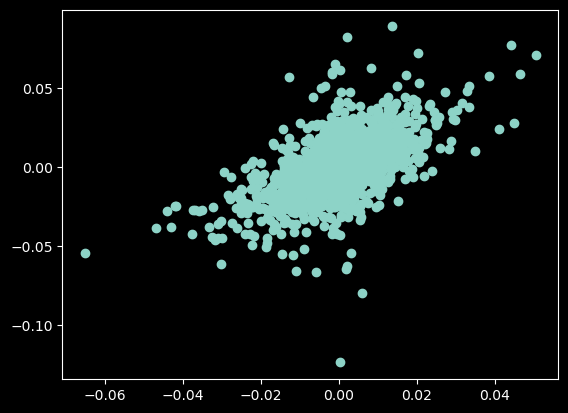

In [77]:
plt.scatter(x, y)

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

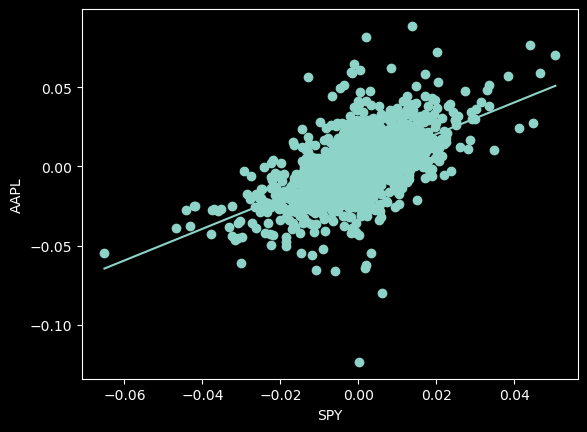

In [79]:
x_pred = np.linspace(x.min(), x.max(), 5).reshape(-1, 1)
y_pred =  model.predict(x_pred)

plt.scatter(x, y)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(x_pred, y_pred)

In [80]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00046298]), array([[0.99836387]]))

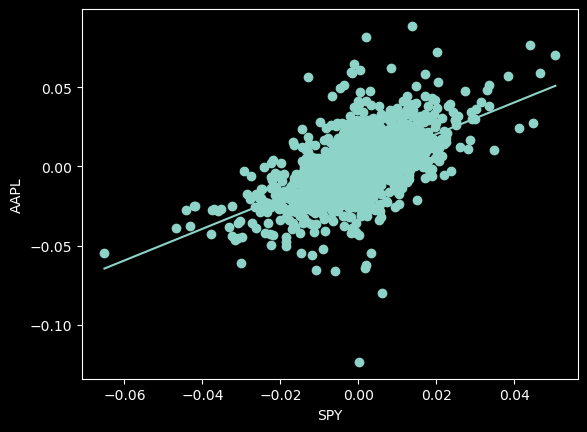

In [81]:
y_pred = beta* x_pred + alpha
plt.scatter(x, y)
plt.xlabel('SPY')
plt.ylabel('AAPL')
plt.plot(x_pred, y_pred)

In [82]:
joined.std()

AAPL    0.016201
SPY     0.009430
dtype: float64

Mixture of Gaussians

In [83]:
from sklearn.mixture import GaussianMixture

In [84]:
data = sbux['log_return'].dropna().to_numpy().reshape(-1, 1)
model = GaussianMixture(n_components=2)
model.fit(data)

c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


GaussianMixture(n_components=2)

In [85]:
weights = model.weights_
mean = model.means_
cov = model.covariances_
print("Weighs" , weights, "\n")
print("Mean" , mean, "\n")
print("Variances" , cov, "\n")

Weighs [0.3809082 0.6190918] 

Mean [[-0.00049004]
 [ 0.00114725]] 

Variances [[[2.97119520e-04]]

 [[6.52014483e-05]]] 



In [86]:
means = mean.flatten()
var = cov.flatten()

In [87]:
x_list = np.linspace(data.min(), data.max(), 100)
fx0 = norm.pdf(x_list, mean[0], np.sqrt(var[0]))
fx1 = norm.pdf(x_list, mean[1], np.sqrt(var[1]))
fx = weights[0] * fx0 + weights[1] * fx1

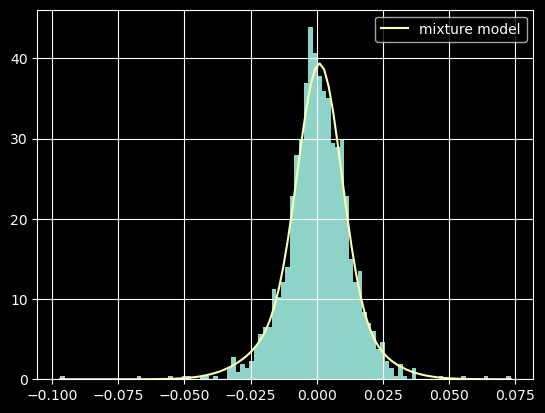

In [88]:
sbux['log_return'].hist(bins=100, density=True)
plt.plot(x_list, fx, label='mixture model')
plt.legend()

Price Simulation

In [89]:
df, loc, scale = t.fit(sbux['return'].dropna())
p0 = sbux.iloc[-1]['close']
prices = [p0]
returns = sbux['return'].dropna()
for _ in range(100):
    r = t.rvs(df, loc, scale)
    p = prices[-1] * (1 + r)
    prices.append(p)

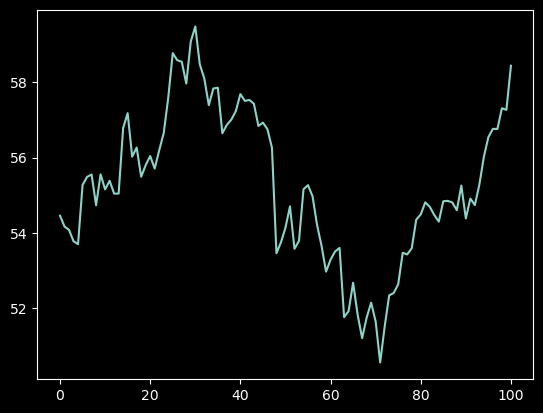

In [90]:
plt.plot(prices)

SMA

In [91]:
close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

In [92]:
goog = close[['GOOG']].copy().dropna()

<Axes: >

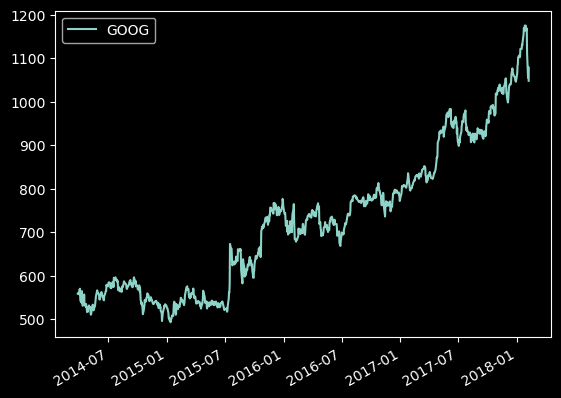

In [93]:
goog.plot()

In [94]:
goog_ret = np.log(goog.pct_change(1) + 1)

<Axes: >

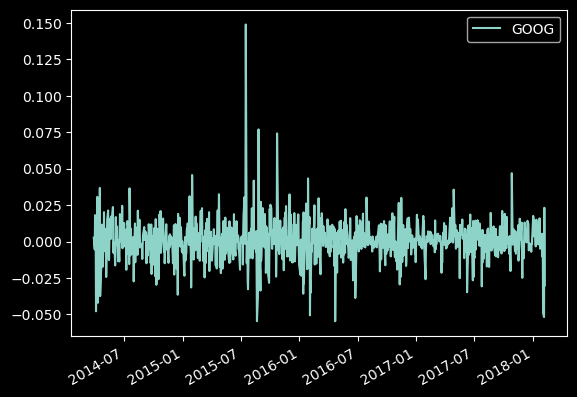

In [95]:
goog_ret.plot()

In [96]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()

<Axes: >

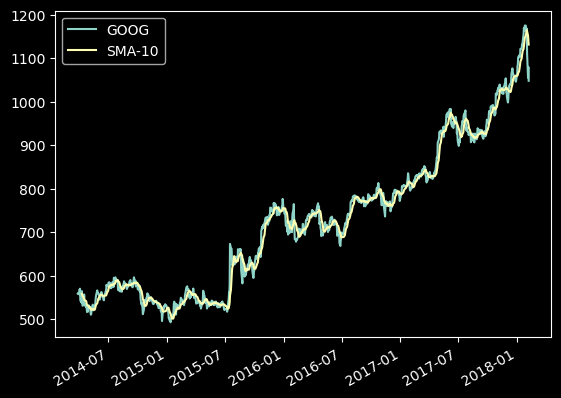

In [97]:
goog.plot()

In [98]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()

<Axes: >

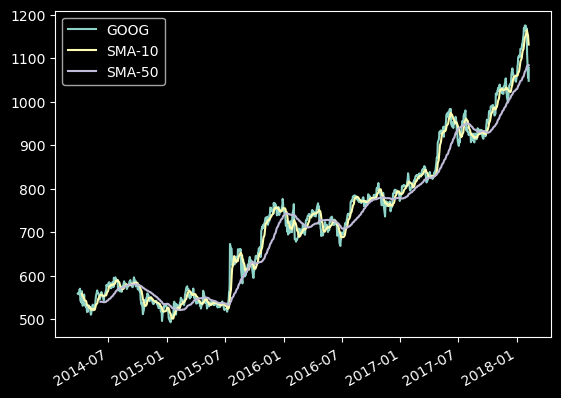

In [99]:
goog.plot()

EWMA and Holt-Winters

In [100]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [101]:
df.head()

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

<Axes: xlabel='Month'>

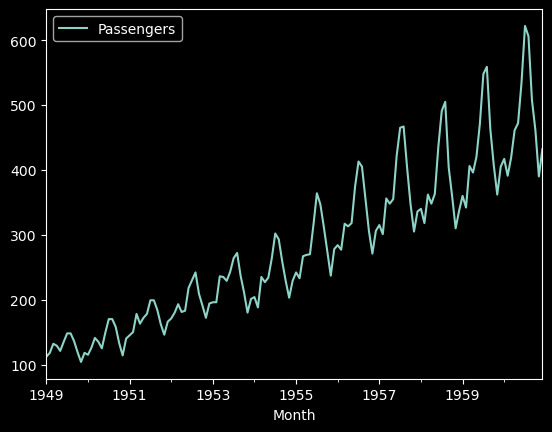

In [102]:
df.plot()

In [103]:
alpha=0.2

In [104]:
df['ewma'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean()

<Axes: xlabel='Month'>

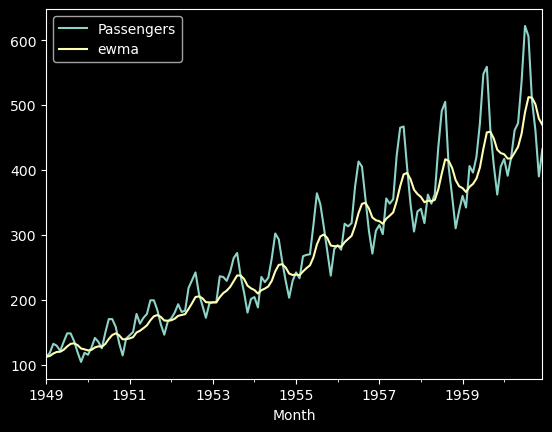

In [105]:
df.plot()

In [106]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [107]:
ses = SimpleExpSmoothing(df['Passengers'])

c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [108]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [109]:
df.index.freq = 'MS'

In [110]:
ses= SimpleExpSmoothing(df['Passengers'])

In [111]:
res = ses.fit(smoothing_level=alpha, optimized=False)

In [112]:
res

In [113]:
res.predict(start=df.index[0], end=df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [114]:
df['SES'] = res.predict(start=df.index[0], end=df.index[-1])

In [115]:
np.allclose(df['SES'], res.fittedvalues)

True

<Axes: xlabel='Month'>

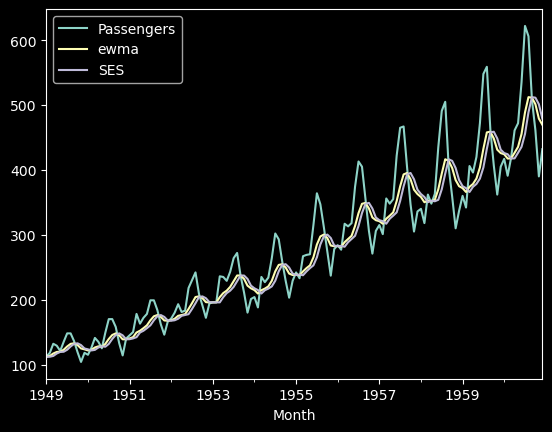

In [116]:
df.plot()

In [117]:
df.head()

Passengers      ewma      SES
Month                                    
1949-01-01         112  112.0000  112.000
1949-02-01         118  113.2000  112.000
1949-03-01         132  116.9600  113.200
1949-04-01         129  119.3680  116.960
1949-05-01         121  119.6944  119.368

In [118]:
df['SES-1'] = df['SES'].shift(-1)

<Axes: xlabel='Month'>

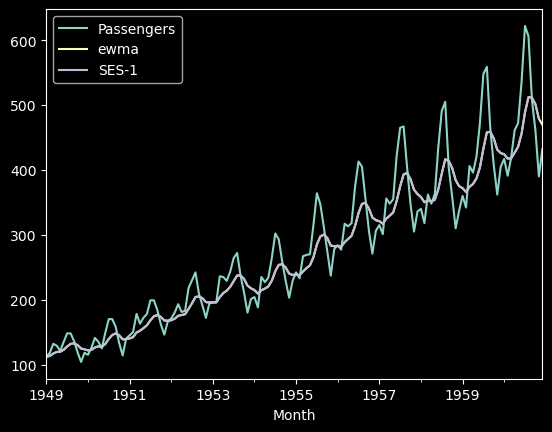

In [119]:
df[['Passengers', 'ewma', 'SES-1']].plot()

In [120]:
N_test = 12
train = df.iloc[:-N_test]
test =  df.iloc[-N_test:]

In [121]:
ses = SimpleExpSmoothing(train['Passengers'])
res = ses.fit()

<Axes: xlabel='Month'>

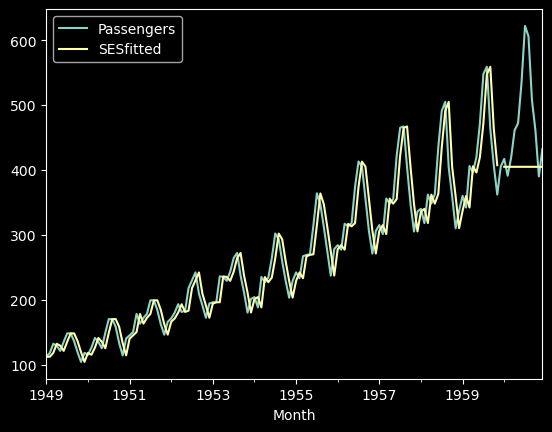

In [122]:
df.loc[:df.index[-N_test-1], 'SESfitted'] = res.fittedvalues
df.loc[df.index[-N_test-1]:, 'SESfitted'] = res.forecast(N_test)
df[['Passengers', 'SESfitted']].plot()

In [123]:
res.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [124]:
from statsmodels.tsa.holtwinters import Holt

In [125]:
holt = Holt(df['Passengers'])

In [126]:
res_h = holt.fit()

In [127]:
df['Holt'] = res_h.fittedvalues

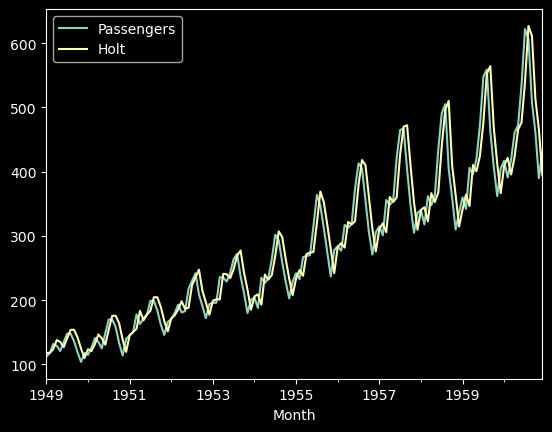

In [128]:
df[['Passengers', 'Holt']].plot();

<Axes: xlabel='Month'>

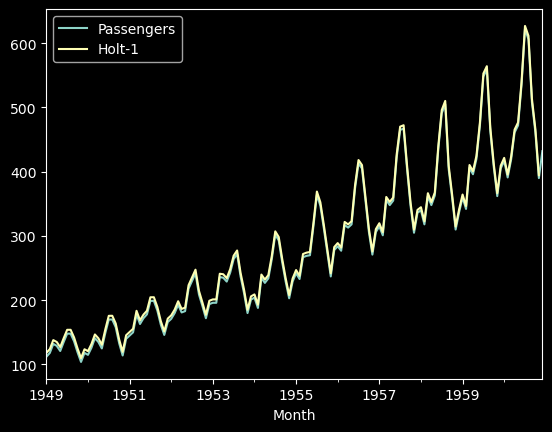

In [129]:
#### No!
df['Holt-1'] = df['Holt'].shift(-1)
df[['Passengers', 'Holt-1']].plot()

In [130]:
holt = Holt(train['Passengers'])
res_h = holt.fit()
df.loc[df.index[:-N_test], 'Holt'] = res_h.fittedvalues

In [131]:
df.loc[df.index[-N_test:], 'Holt'] = res_h.forecast(N_test)

<Axes: xlabel='Month'>

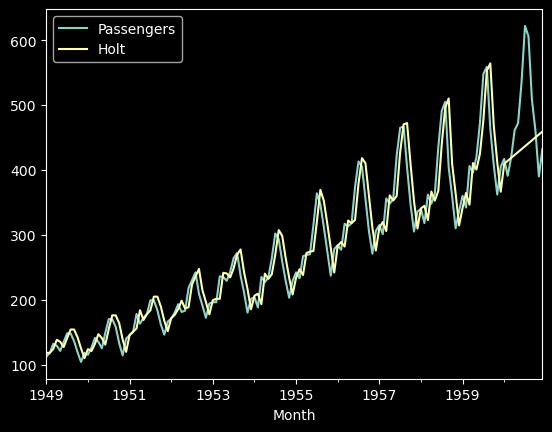

In [132]:
df[['Passengers', 'Holt']].plot()

In [133]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [134]:
hw = ExponentialSmoothing(train['Passengers'], \
                          trend='add', seasonal='add', seasonal_periods=12)

res_hw = hw.fit()

In [135]:
df.loc[df.index[:-N_test], 'HoltWinters'] = res_hw.fittedvalues

In [136]:
df.loc[df.index[-N_test:], 'HoltWinters'] = res_hw.forecast(N_test)

<Axes: xlabel='Month'>

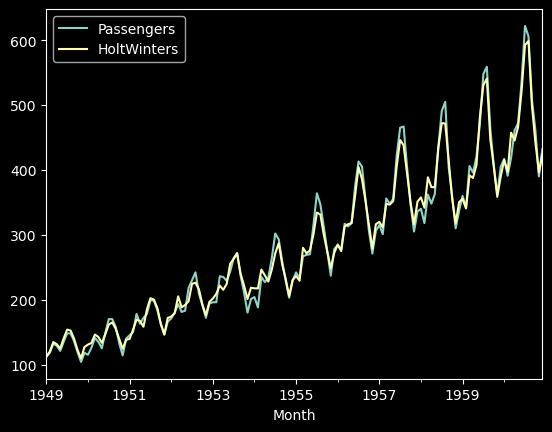

In [137]:
df[['Passengers', 'HoltWinters']].plot()

In [138]:
def rmse(y, t):
    return np.sqrt(np.mean((y - t) ** 2))

In [139]:
def mae(y, t):
    return np.mean(np.abs(y - t))

In [140]:
print('Train RMSE : ', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE : ', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE :  11.624680178005294
Test RMSE :  16.979906128442913


In [141]:
print('Train MSE: ', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MSE: ', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MSE:  9.008103165547778
Test MSE:  13.380462475074248


In [142]:
hw = ExponentialSmoothing(train['Passengers'], \
                        trend='add', seasonal='mul', seasonal_periods=12)

res_hw = hw.fit()

In [143]:
df.loc[df.index[:-N_test], 'HoltWinters'] = res_hw.fittedvalues

In [144]:
df.loc[df.index[-N_test:], 'HoltWinters'] = res_hw.forecast(N_test)

<Axes: xlabel='Month'>

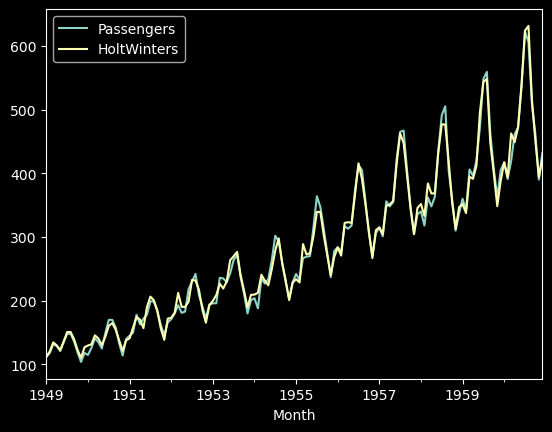

In [145]:
df[['Passengers', 'HoltWinters']].plot()

In [146]:
print('Train RMSE : ', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE : ', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE :  9.768021865952148
Test RMSE :  15.807367605699495


In [147]:
print('Train MSE: ', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MSE: ', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MSE:  7.604261037973922
Test MSE:  10.299694207748567


c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

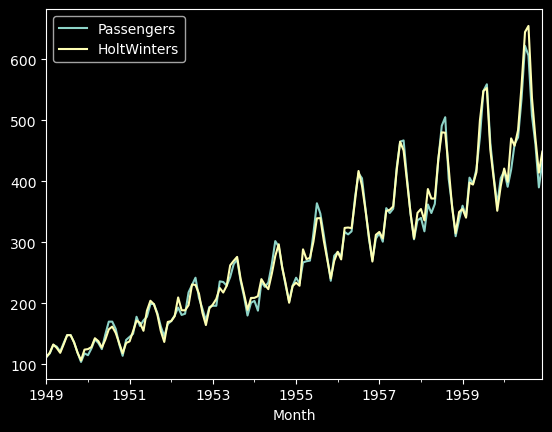

In [148]:
hw = ExponentialSmoothing(train['Passengers'], \
                        trend='mul', seasonal='mul', seasonal_periods=12)

res_hw = hw.fit()
df.loc[df.index[:-N_test], 'HoltWinters'] = res_hw.fittedvalues
df.loc[df.index[-N_test:], 'HoltWinters'] = res_hw.forecast(N_test)
df[['Passengers', 'HoltWinters']].plot()

In [149]:
print('Train RMSE : ', rmse(train['Passengers'], res_hw.fittedvalues))
print('Test RMSE : ', rmse(test['Passengers'], res_hw.forecast(N_test)))

Train RMSE :  9.6179248297903
Test RMSE :  25.810226318474683


In [150]:
print('Train MSE: ', mae(train['Passengers'], res_hw.fittedvalues))
print('Test MSE: ', mae(test['Passengers'], res_hw.forecast(N_test)))

Train MSE:  7.112440339079641
Test MSE:  20.848100067783903


ARIMA

In [151]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [152]:
df['lstdiff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

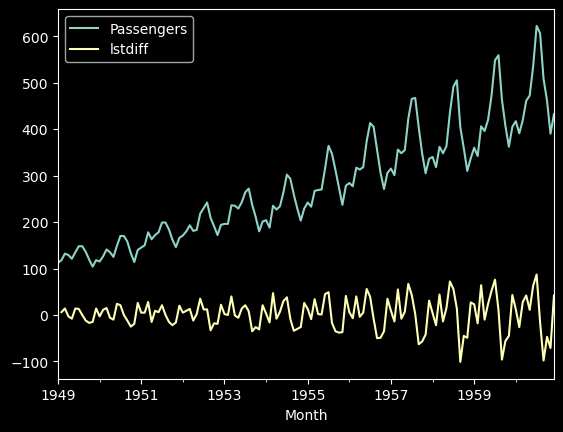

In [153]:
df.plot()

In [154]:
df['LogPassengers'] = np.log(df['Passengers'])

<Axes: xlabel='Month'>

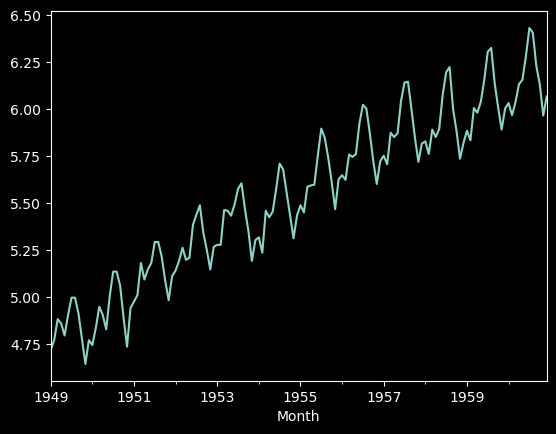

In [155]:
df['LogPassengers'].plot()

In [156]:
from statsmodels.tsa.arima.model import ARIMA

In [157]:
df.index.freq = 'MS'

Ntest = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [158]:
arima = ARIMA(train['Passengers'], order=(1,0,0))

In [159]:
arima_result = arima.fit()

In [160]:
df.loc[:df.index[-Ntest-1], 'AR(1)'] = arima_result.predict(start=train.index[0], end=train.index[-1])

<Axes: xlabel='Month'>

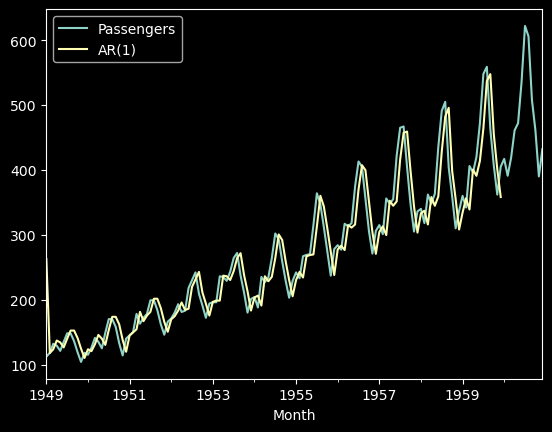

In [161]:
df[['Passengers', 'AR(1)']].plot()

In [162]:
forecast_result = arima_result.get_forecast(steps=Ntest)

forecast = forecast_result.predicted_mean
stderr = forecast_result.se_mean        
confint = forecast_result.conf_int()    

In [163]:
df.loc[df.index[-Ntest-1]:, 'AR(1)'] = forecast

<Axes: xlabel='Month'>

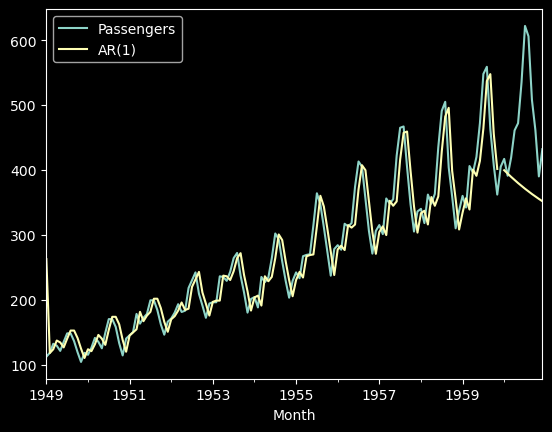

In [164]:
df[['Passengers', 'AR(1)']].plot()

In [165]:
import matplotlib.pyplot as plt

def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(df['Passengers'], label='data')

    # Plot the curve fitted on the train set
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')

    # Forecast the test set
    forecast_result = result.get_forecast(steps=Ntest)

    forecast = forecast_result.predicted_mean  # Forecasted values
    confint = forecast_result.conf_int()       # Confidence intervals

    # Plot forecast
    ax.plot(test.index, forecast, label='forecast')

    # Correct indexing for confidence intervals
    ax.fill_between(test.index, confint.iloc[:, 0], confint.iloc[:, 1], color='red', alpha=0.3)

    ax.legend()
    plt.show()


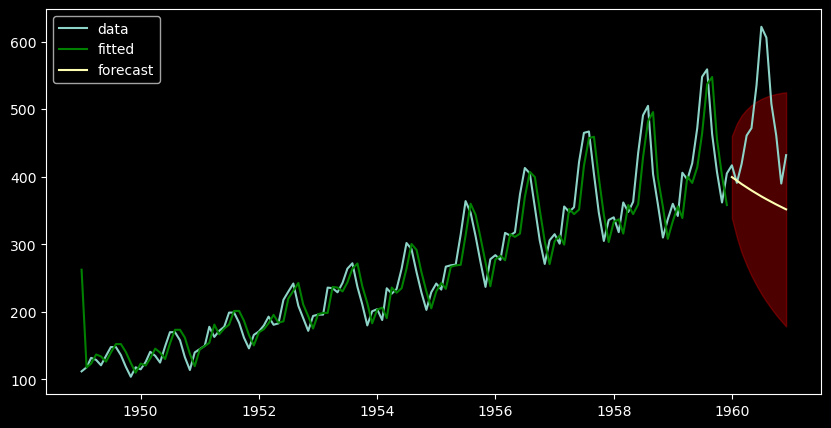

In [166]:
plot_fit_and_forecast(arima_result)

c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


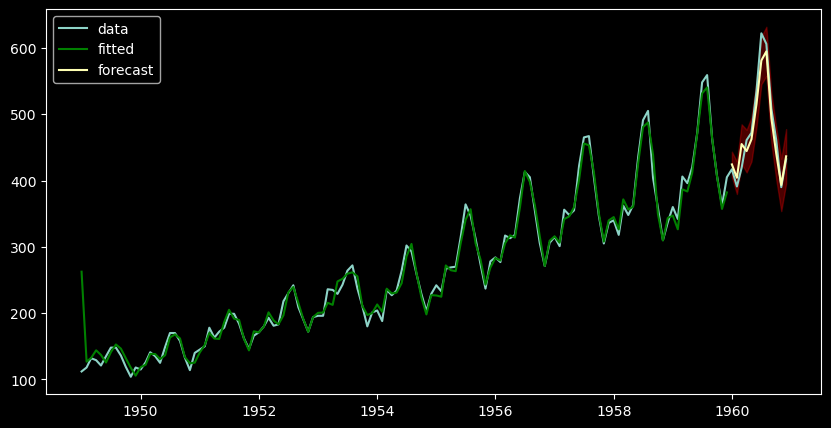

In [167]:
arima = ARIMA(train['Passengers'], order=(20,0,0))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


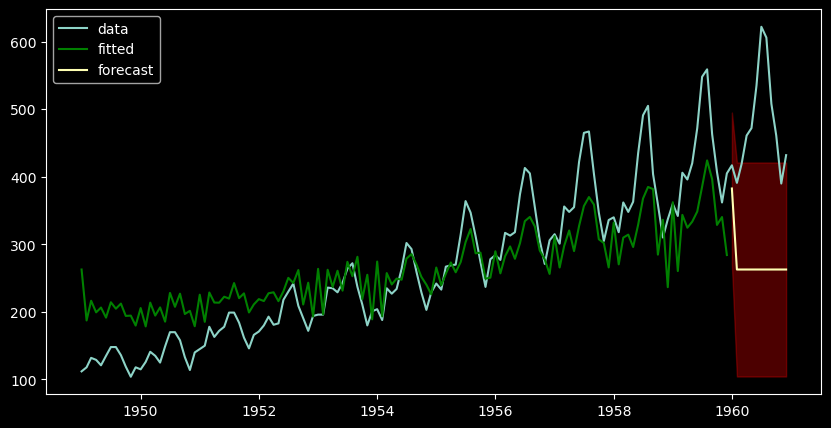

In [168]:
arima = ARIMA(train['Passengers'], order=(0,0,1))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [169]:
df

Passengers  lstdiff  LogPassengers       AR(1)
Month                                                     
1949-01-01         112      NaN       4.718499  262.490027
1949-02-01         118      6.0       4.770685  117.750054
1949-03-01         132     14.0       4.882802  123.520801
1949-04-01         129     -3.0       4.859812  136.985876
1949-05-01         121     -8.0       4.795791  134.100503
...                ...      ...            ...         ...
1960-08-01         606    -16.0       6.406880  366.839773
1960-09-01         508    -98.0       6.230481  362.852687
1960-10-01         461    -47.0       6.133398  359.017944
1960-11-01         390    -71.0       5.966147  355.329721
1960-12-01         432     42.0       6.068426  351.782421

[144 rows x 4 columns]

In [170]:
df['Log1stDiff'] = df['LogPassengers'].diff()

<Axes: xlabel='Month'>

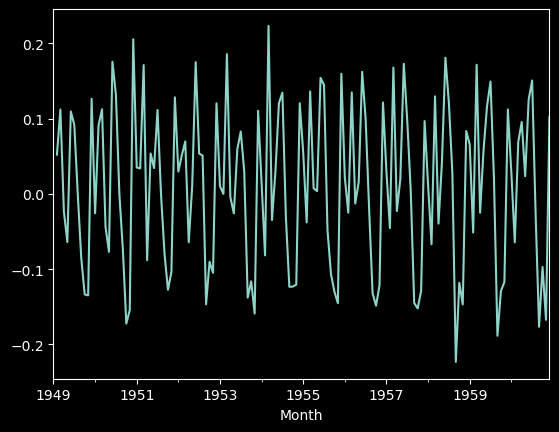

In [171]:
df['Log1stDiff'].plot()

In [172]:
arima = ARIMA(train['Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()

def plot_fit_and_forecast_int(result, d, col='Passengers'):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df[col], label='data')

    # # Plot the curve fitted on train set
    train_pred = result.predict(start = train.index[d], end=train.index[-1], \
        typ='level')
    ax.plot(train.index[d:], train_pred, color='green', label='fitted')

    # Forecast the test set
    forecast_result = result.get_forecast(steps=Ntest)

    forecast = forecast_result.predicted_mean
    stderr = forecast_result.se_mean    
    confint = forecast_result.conf_int()
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, \
        confint.iloc[:,0], confint.iloc[:,1], \
            color='red', alpha=0.3)
    ax.legend()

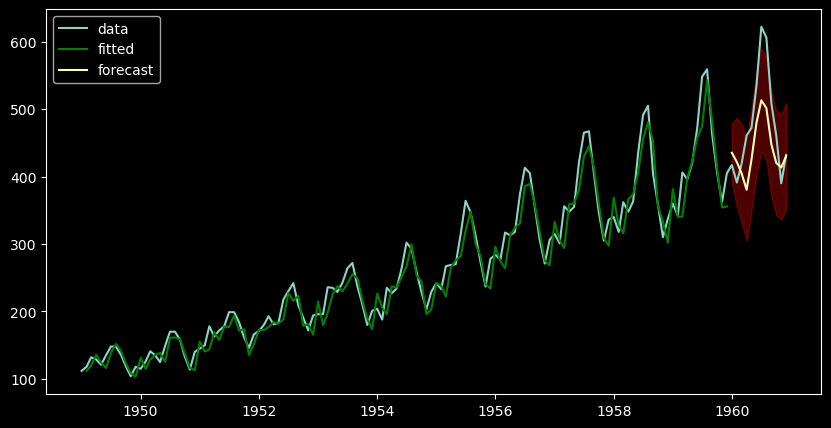

In [173]:
plot_fit_and_forecast_int(arima_result_811,1)

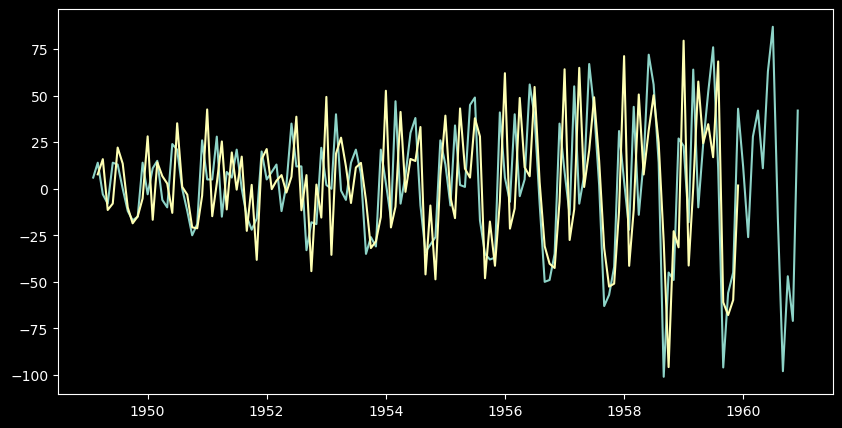

In [174]:
def plot_difference(result,d, col='Passengers'):
    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    diff = df[col].diff()
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(diff, label='true 1st difference')
    ax.plot(train_pred.diff(), label='fitted 1st difference')

plot_difference(arima_result_811,1)

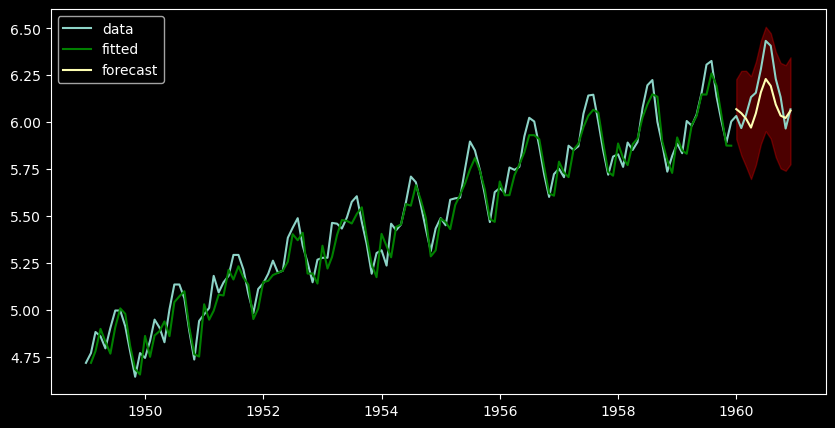

In [175]:
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

In [176]:
def rmse(result, is_logged):
    # Forecast the test set
    forecast_result = result.get_forecast(steps=Ntest)

    forecast = forecast_result.predicted_mean
    stderr = forecast_result.se_mean    
    confint = forecast_result.conf_int()
    
    if is_logged:
        forecast = np.exp(forecast)
        
    t = test['Passengers']
    y = forecast
    return np.squeeze(np.mean(t-y) ** 2)

In [177]:
print('ARIMA(8,1,1): ', rmse(arima_result_811, False))

ARIMA(8,1,1):  1351.3243824849023


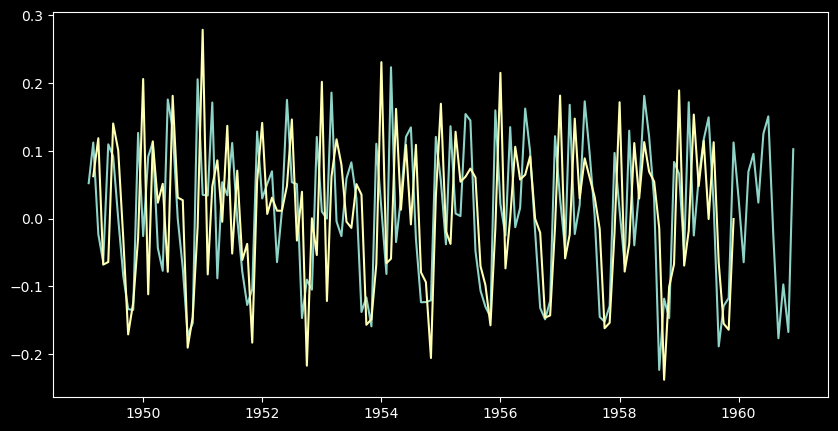

In [178]:
plot_difference(arima_result_log811,1,col='LogPassengers')

In [179]:
print('ARIMA(8,1,1): ', rmse(arima_result_811, False))

ARIMA(8,1,1):  1351.3243824849023


c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


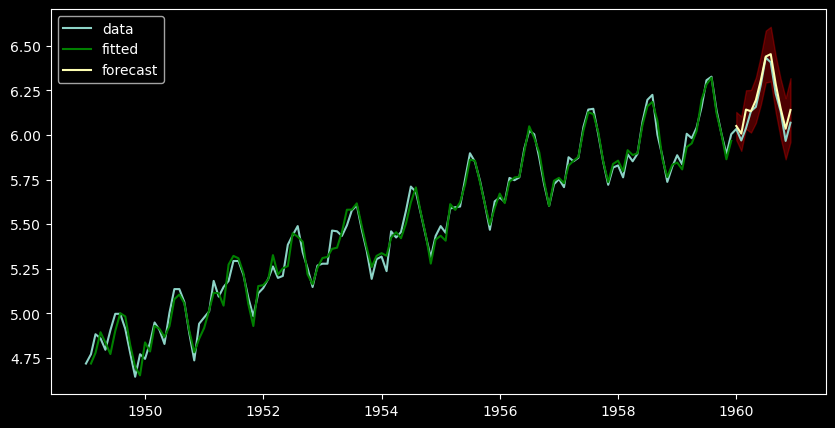

In [180]:
arima = ARIMA(train['LogPassengers'], order=(12,1,1))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [181]:
def rmse(result, is_logged):
    # Forecast the test set
    forecast_result = result.get_forecast(steps=Ntest)

    forecast = forecast_result.predicted_mean
    stderr = forecast_result.se_mean    
    confint = forecast_result.conf_int()
    
    if is_logged:
        forecast = np.exp(forecast)
        
    t = test['Passengers']
    y = forecast
    return np.squeeze(np.mean(t-y) ** 2)

In [182]:
print(rmse(arima_result_811, False))
print(rmse(arima_result_log811, True))
print(rmse(arima_result_log1210, True))

1351.3243824849023
1464.0416837948028
354.11872420614776


Stationarity

In [183]:
from statsmodels.tsa.stattools import adfuller

In [184]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates = True)

<Axes: xlabel='Month'>

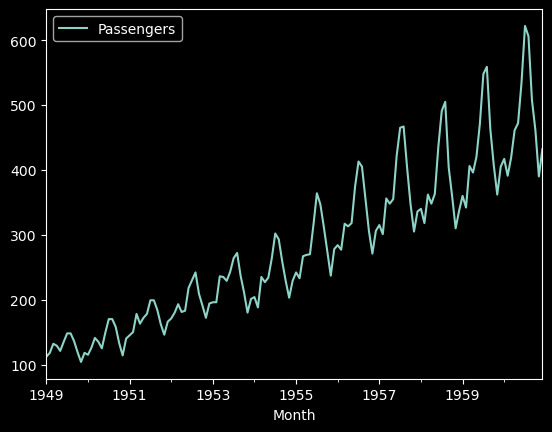

In [185]:
df.plot()

In [186]:
adfuller(df['Passengers'])

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [187]:
def adf(x):
    res = adfuller(x)
    print('Test-Statistic: ', res[0])
    print('P-value: ', res[1])
    if res[1] < 0.05:
        print("Stationary")
    else:
        print("Non-Stationary")


In [188]:
adf(df['Passengers'])

Test-Statistic:  0.8153688792060482
P-value:  0.991880243437641
Non-Stationary


In [189]:
adf(np.random.randn(100))

Test-Statistic:  -4.182472479118536
P-value:  0.0007053890447257466
Stationary


In [190]:
adf(np.random.gamma(1,1,100))

Test-Statistic:  -10.414855892480812
P-value:  1.765247733200566e-18
Stationary


In [191]:
df['LogPassengers'] = np.log(df['Passengers'])

In [192]:
adf(df['LogPassengers'])

Test-Statistic:  -1.7170170891069607
P-value:  0.42236677477039125
Non-Stationary


In [193]:
df['Diff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

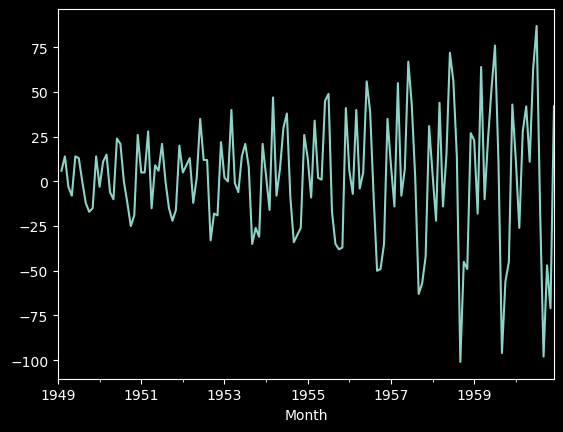

In [194]:
df['Diff'].plot()

In [195]:
adf(df['Diff'].dropna())


Test-Statistic:  -2.8292668241699994
P-value:  0.0542132902838255
Non-Stationary


In [196]:
df['DiffLog'] = df['LogPassengers'].diff()

<Axes: xlabel='Month'>

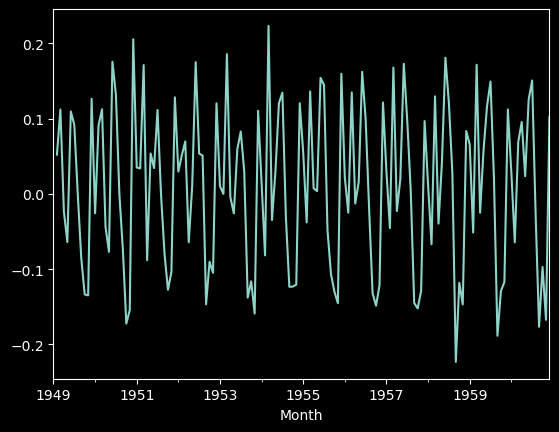

In [197]:
df['DiffLog'].plot()

In [198]:
adf(df['DiffLog'].dropna())

Test-Statistic:  -2.717130598388133
P-value:  0.07112054815085875
Non-Stationary


In [199]:
stocks = pd.read_csv('sp500sub.csv')

In [200]:
stocks

Date       Open       High        Low      Close  Adj Close  \
0       2010-01-04   9.220000   9.510000   9.170000   9.500000   9.500000   
1       2010-01-05   9.510000  10.290000   9.450000  10.270000  10.270000   
2       2010-01-06  10.380000  11.090000  10.350000  11.000000  11.000000   
3       2010-01-07  11.000000  11.060000  10.620000  10.820000  10.820000   
4       2010-01-08  10.820000  11.000000  10.750000  10.940000  10.940000   
...            ...        ...        ...        ...        ...        ...   
225072  2018-12-21  41.000000  41.900002  40.369999  40.680000  39.367714   
225073  2018-12-24  40.720001  40.849998  39.200001  39.480000  38.206425   
225074  2018-12-26  39.619999  40.029999  38.779999  40.000000  38.709652   
225075  2018-12-27  39.790001  40.259998  39.189999  40.230000  38.932228   
225076  2018-12-28  40.180000  40.480000  39.730000  39.889999  38.854305   

            Volume  Name  
0        1865400.0  INCY  
1        7608900.0  INCY  
2        8046700.0  INCY  
3        3680300.0  INCY  
4        1529300.0  INCY  
...            ...   ...  
225072  17481400.0  MDLZ  
225073   6641300.0  MDLZ  
225074   8640100.0  MDLZ  
225075  11149900.0  MDLZ  
225076   7463500.0  MDLZ  

[225077 rows x 8 columns]

In [201]:
goog = stocks[stocks['Name'] == 'GOOG'][['Close']]

In [202]:
goog

Close
33496   312.204773
33497   310.829926
33498   302.994293
33499   295.940735
33500   299.885956
...            ...
35754   979.539978
35755   976.219971
35756  1039.459961
35757  1043.880005
35758  1037.079956

[2263 rows x 1 columns]

In [203]:
goog['LogPrice'] = np.log(goog['Close'])

In [204]:
goog['LogRet'] = goog['LogPrice'].diff()

<Axes: >

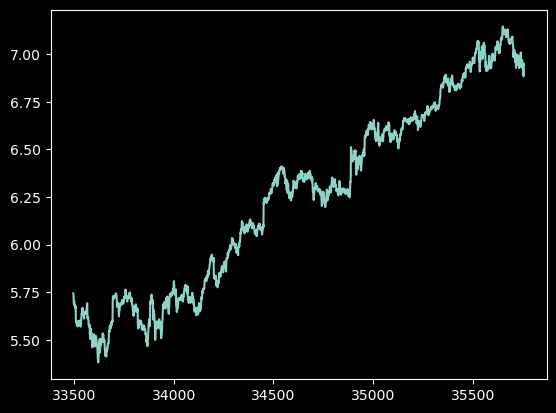

In [205]:
goog['LogPrice'].plot()

<Axes: >

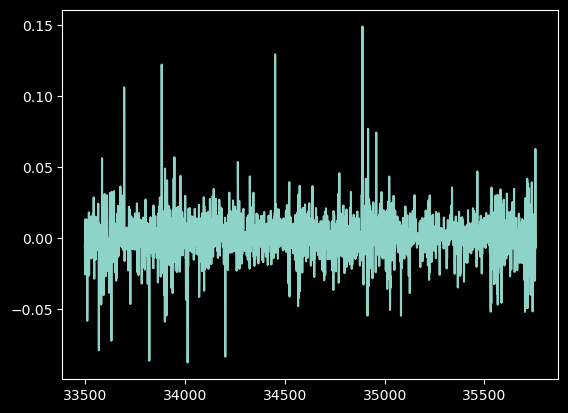

In [206]:
goog['LogRet'].plot()

In [207]:
adf(goog['LogPrice'])

Test-Statistic:  -0.4181902578906113
P-value:  0.907017067749841
Non-Stationary


In [208]:
adf(goog['LogRet'].dropna())

Test-Statistic:  -46.66748022773676
P-value:  0.0
Stationary


In [209]:
sbux = stocks[stocks['Name'] == 'SBUX'][['Close']]

In [210]:
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['LogRet'] = sbux['LogPrice'].diff()

<Axes: >

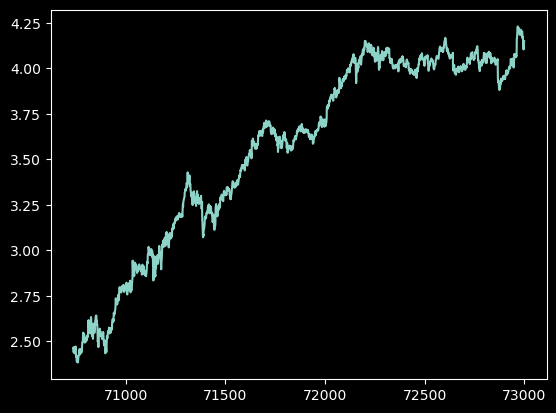

In [211]:
sbux['LogPrice'].plot()

<Axes: >

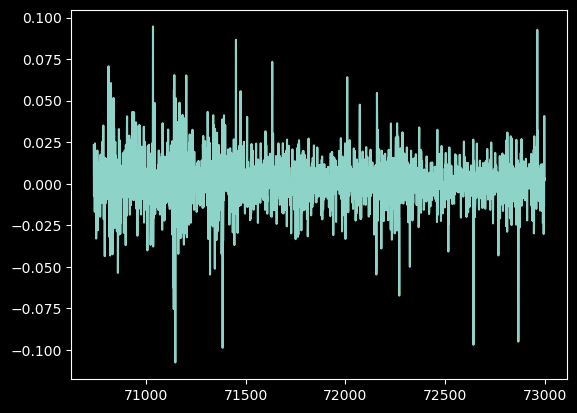

In [212]:
sbux['LogRet'].plot()

In [213]:
adf(sbux['LogPrice'])

Test-Statistic:  -1.9020133583900012
P-value:  0.3311145569853755
Non-Stationary


In [214]:
adf(sbux['LogRet'].dropna())

Test-Statistic:  -30.086501426958183
P-value:  0.0
Stationary


PACF and ACF

In [215]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [216]:
x0 = np.random.rand(1000)

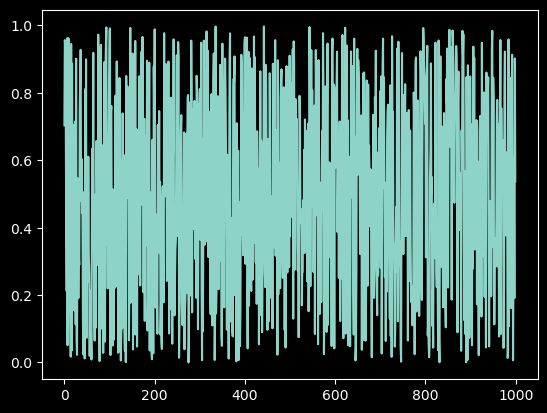

In [217]:
plt.plot(x0)

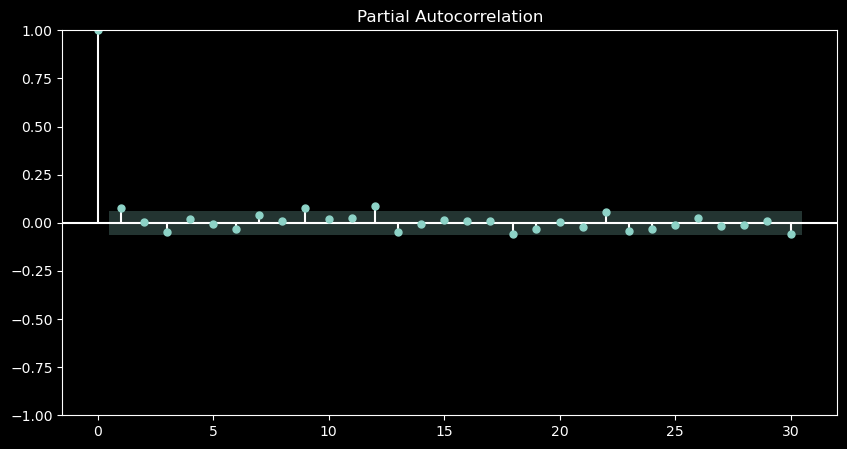

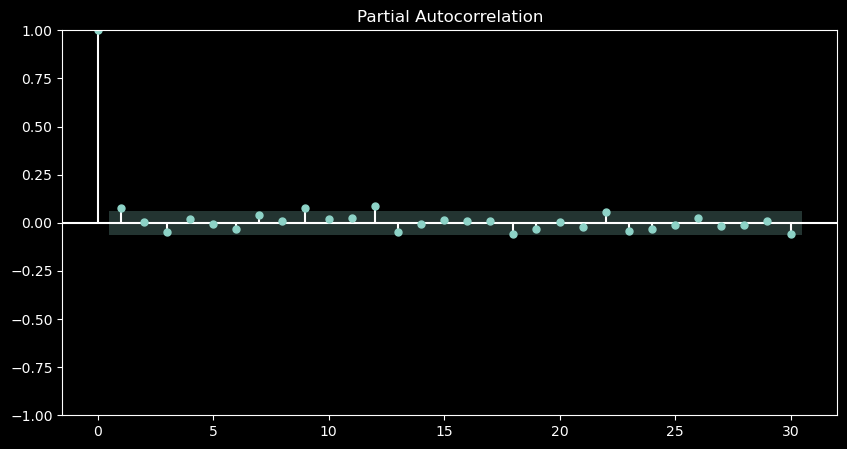

In [218]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x0, ax=ax)

In [219]:
x1 = [0]
for i in range(1000):
    x = 0.5 * x1[-1] + 0.1 * np.random.randn()
    x1.append(x)
x1 = np.array(x1)

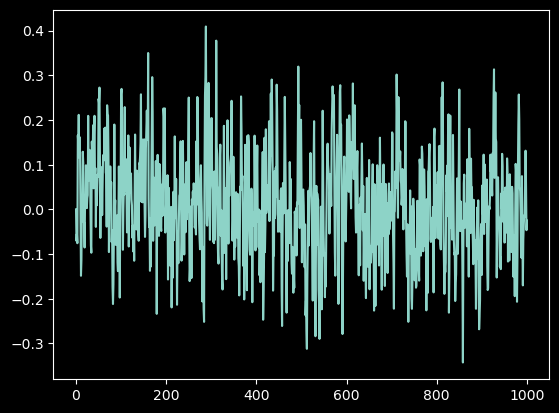

In [220]:
plt.plot(x1)

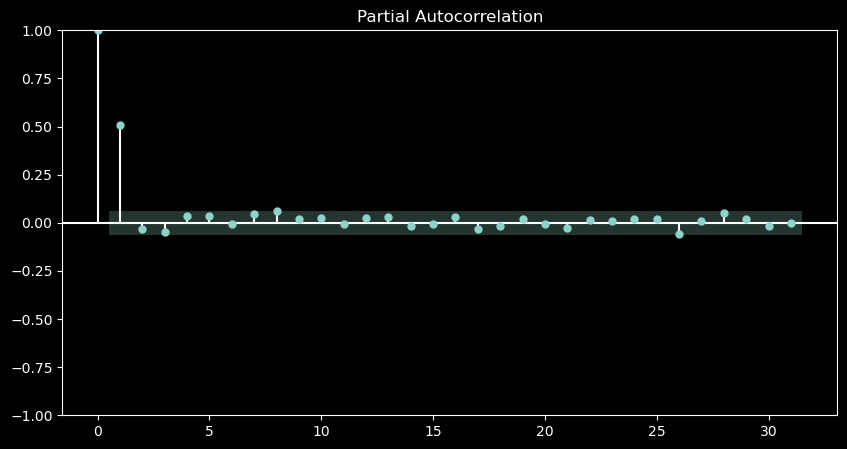

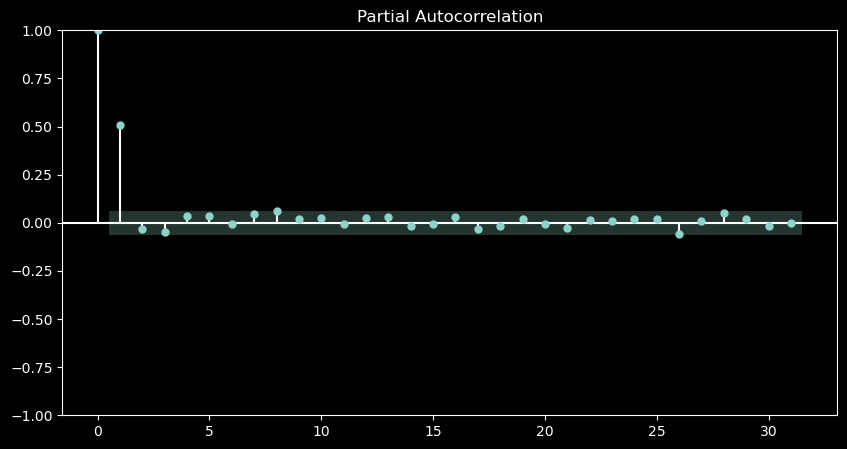

In [221]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x1, ax=ax)

In [222]:
x1 = [0]
for i in range(1000):
    x = -0.5 * x1[-1] + 0.1 * np.random.randn()
    x1.append(x)
x1 = np.array(x1)

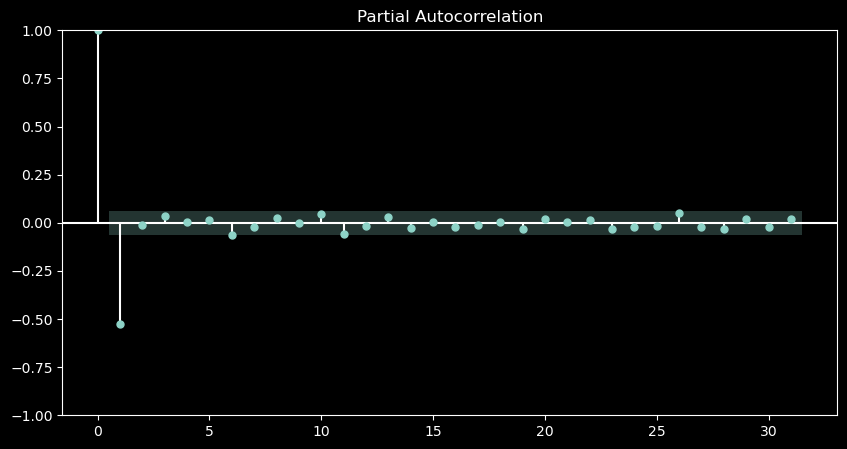

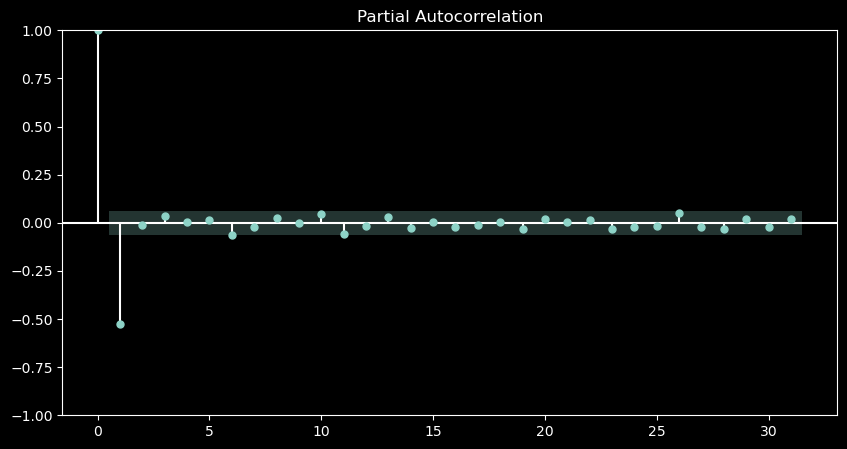

In [223]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x1, ax=ax)

In [224]:
x2 = [0,0]
for i in range(1000):
    x = 0.5 * x2[-1] - 0.3 * x2[-2] + 0.1 * np.random.randn()
    x2.append(x)
x2 = np.array(x2)

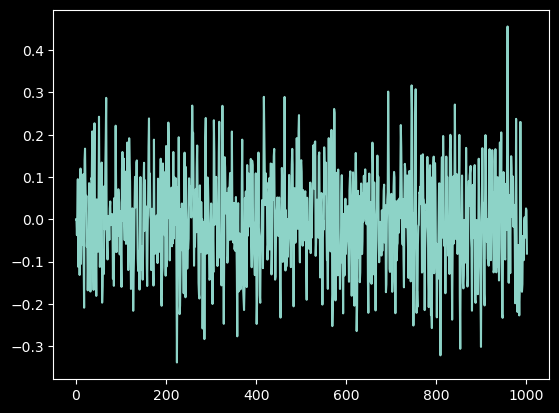

In [225]:
plt.plot(x2)

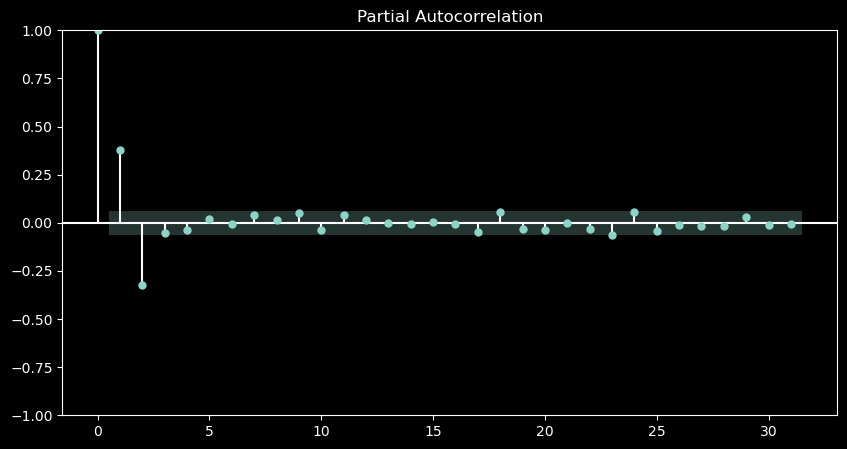

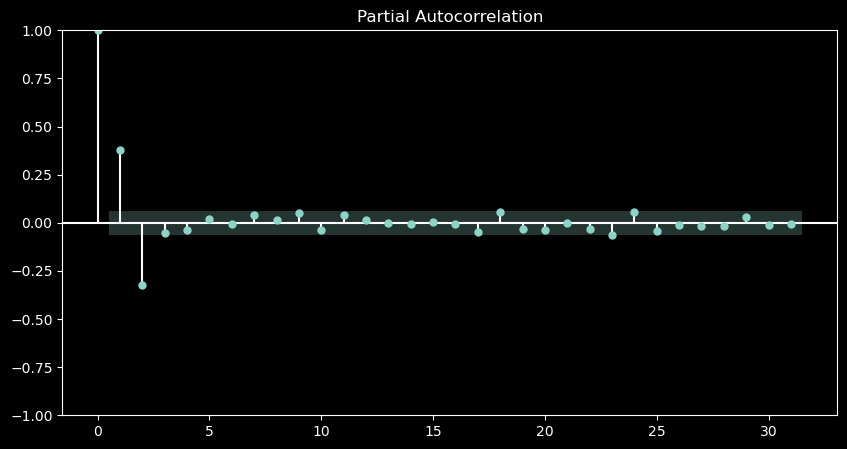

In [226]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x2, ax=ax)

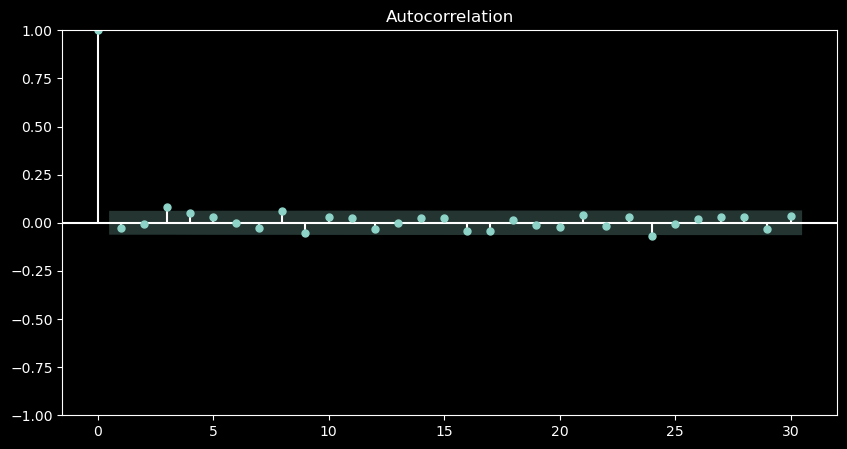

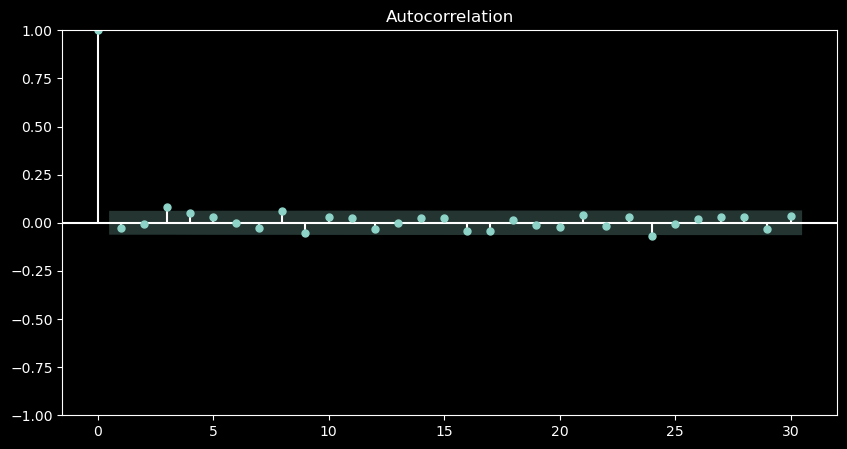

In [227]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(np.random.randn(1000), ax=ax)

In [228]:
errors = 0.1 * np.random.rand(1000)
ma1 = []
for i in range(1000):
    if i >= 1:
        x = 0.5 * errors[i-1] + errors[i]
    else:
        x = errors[i]
    ma1.append(x)
ma1 = np.array(ma1)

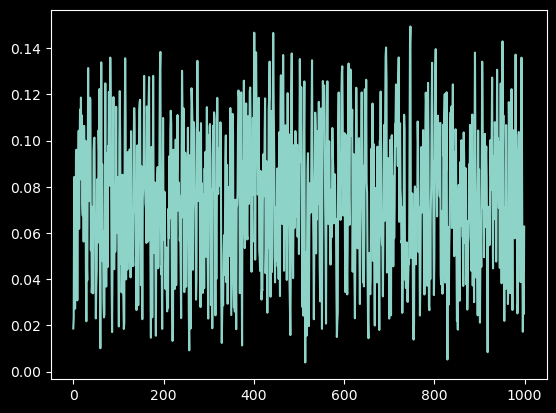

In [229]:
plt.plot(ma1)

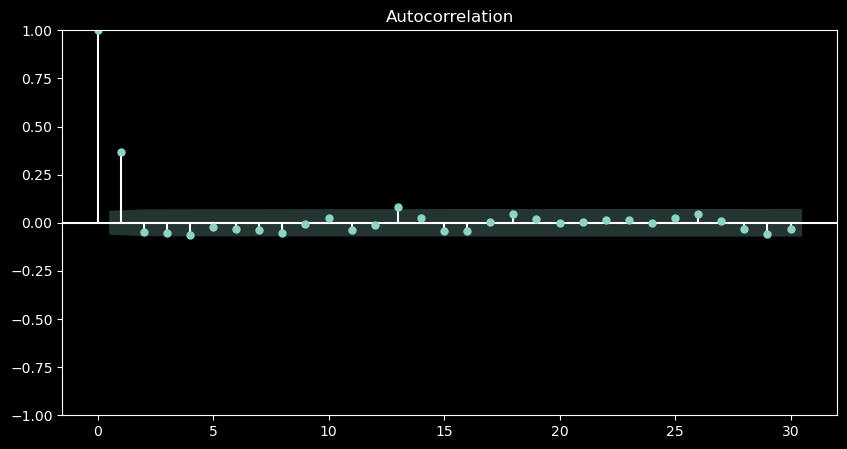

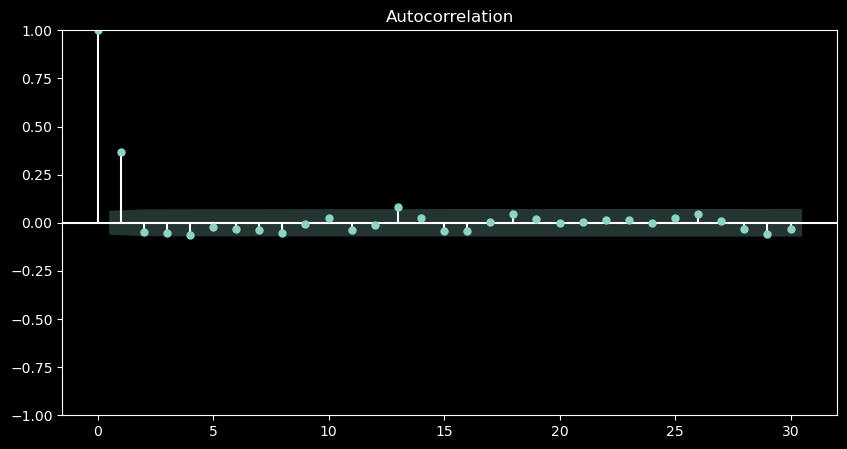

In [230]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(ma1, ax=ax)

In [231]:
errors = 0.1 * np.random.rand(1000)
ma2 = []
for i in range(1000):
    if i >= 1:
        x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + errors[i]
    else:
        x = errors[i]
    ma2.append(x)
ma2 = np.array(ma2)

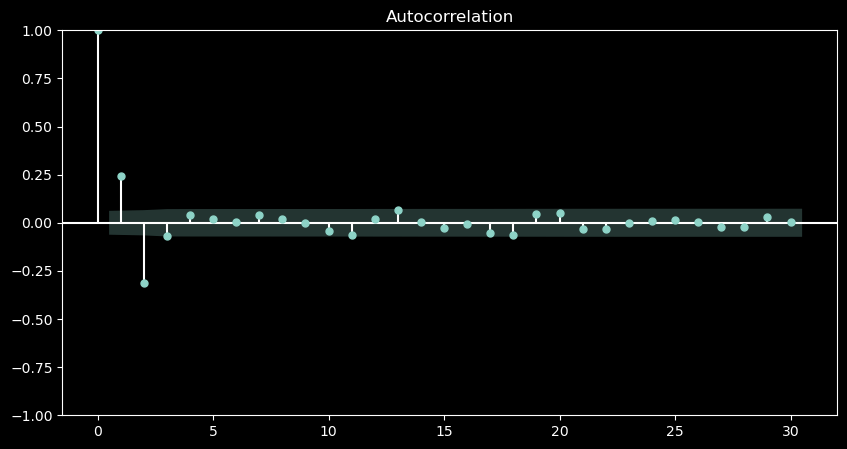

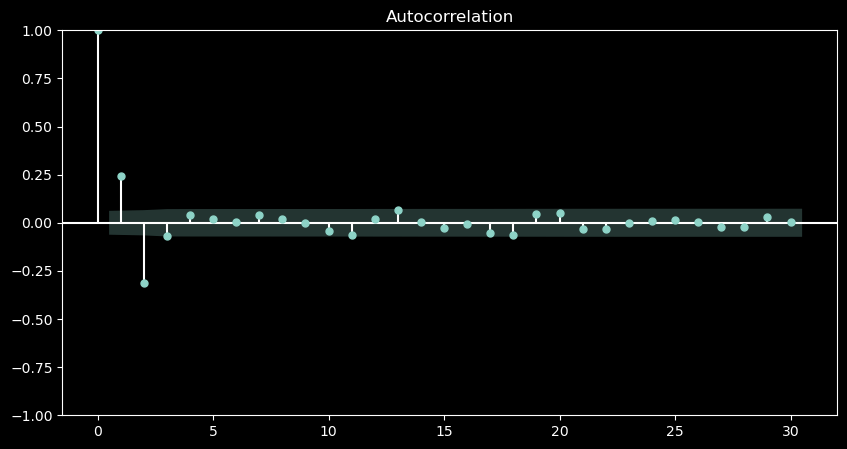

In [232]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(ma2, ax=ax)

In [233]:
errors = 0.1 * np.random.rand(1000)
ma3 = []
for i in range(1000):
    if i >= 1:
        x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3]  + errors[i]
    else:
        x = errors[i]
    ma3.append(x)
ma3 = np.array(ma3)

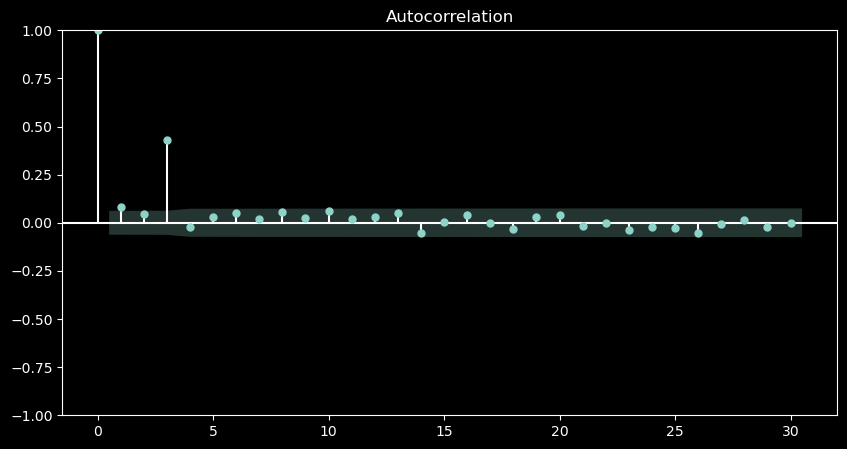

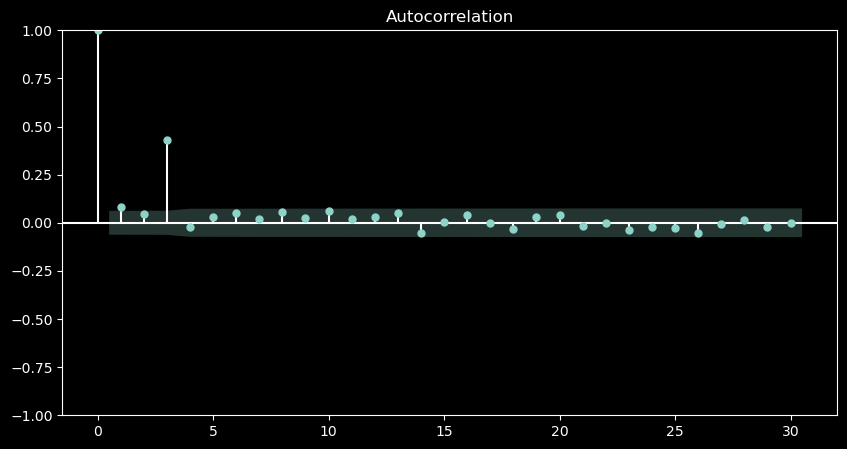

In [234]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(ma3, ax=ax)

In [235]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates = True)

In [236]:
df['LogPassengers'] = np.log(df['Passengers'])

In [237]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

AUTO ARIMA

In [238]:
import pmdarima as pm

In [239]:
model = pm.auto_arima(train['Passengers'],
trace=True,
supperss_warnings=True,
seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.36 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.14 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=907.065, Time=0.92 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.10 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.20 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.07 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.16 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

In [240]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Fri, 28 Mar 2025   AIC                            905.686
Time:                                    15:08:06   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [241]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

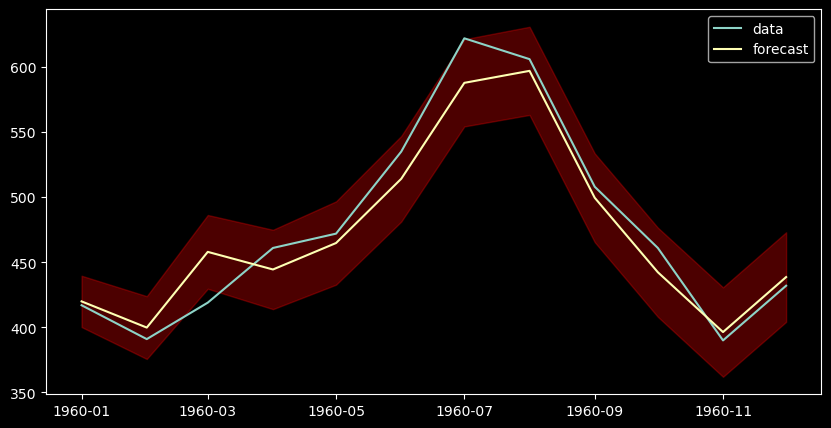

In [242]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

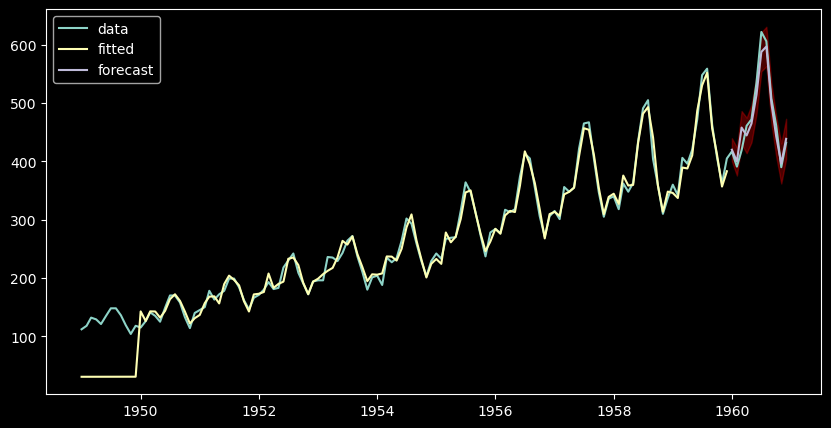

In [243]:
train_pred = model.predict_in_sample(start=0, end=-1)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

In [244]:
logmodel = pm.auto_arima(train['LogPassengers'],
trace=True,
supperss_warnings=True,
seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.271, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.35 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.22 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.324, Time=0.58 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.30 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.331, Time=1.74 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.716, Time=0.63 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.575, Time=0.53 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.22 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-439.838, Time=0.59 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.492, Time=1.01 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [245]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Fri, 28 Mar 2025   AIC                            905.686
Time:                                    15:08:26   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

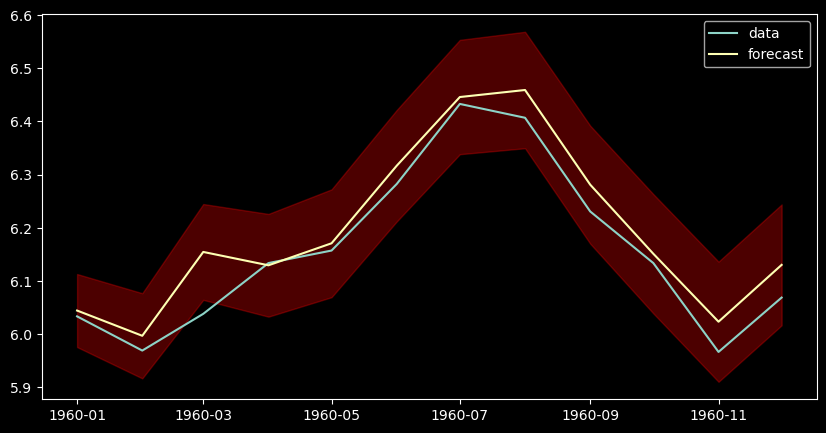

In [246]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index,confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

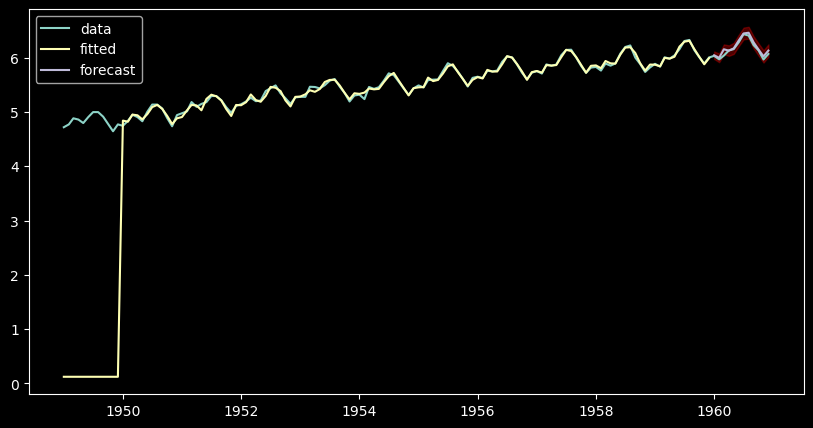

In [247]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index,confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

In [248]:
def rmse(t, y):
    return  np.sqrt(np.mean((t-y) ** 2))

In [249]:
print(rmse(test['Passengers'], test_pred))
print(rmse(test['Passengers'], np.exp(test_pred_log)))

18.536468982716766
23.044304400934383


In [250]:
model = pm.auto_arima(train['LogPassengers'],
trace=True,
suppress_warnings=True,
max_p=12, max_q=2, max_order=14,
stepwise=False,
seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.135, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.403, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-251.010, Time=0.27 sec
 ARIMA(5,1,0)(0,0,0)[0] interc

In [251]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 227.058
Date:                Fri, 28 Mar 2025   AIC                           -424.117
Time:                        15:08:39   BIC                           -380.989
Sample:                    01-01-1949   HQIC                          -406.592
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0073      0.006      1.262      0.207      -0.004       0.019
ar.L1          0.0359      0.088      0.406      0.685      -0.137       0.209
ar.L2         -0.0802      0.069     -1.167      0.243      -0.215       0.054
ar.L3         -0.0494      0.067     -0.735      0.462      -0.181       0.082
ar.L4         -0.1237      0.073     -1.706      0.088      -0.266       0.018
ar.L5          0.0208      0.065      0.319      0.750      -0.107       0.149
ar.L6         -0.0679      0.066     -1.032      0.302      -0.197       0.061
ar.L7         -0.0634      0.073     -0.865      0.387      -0.207       0.080
ar.L8         -0.1122      0.066     -1.690      0.091      -0.242       0.018
ar.L9          0.0136      0.078      0.174      0.861      -0.139       0.166
ar.L10        -0.0870      0.066     -1.321      0.187      -0.216       0.042
ar.L11        -0.0022      0.073     -0.030      0.976      -0.144       0.140
ar.L12         0.7875      0.063     12.462      0.000       0.664       0.911
ma.L1         -0.3692      0.123     -2.993      0.003      -0.611      -0.127
sigma2         0.0016      0.000      7.143      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.50
Prob(Q):                              0.98   Prob(JB):                         0.29
Heteroskedasticity (H):               0.37   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

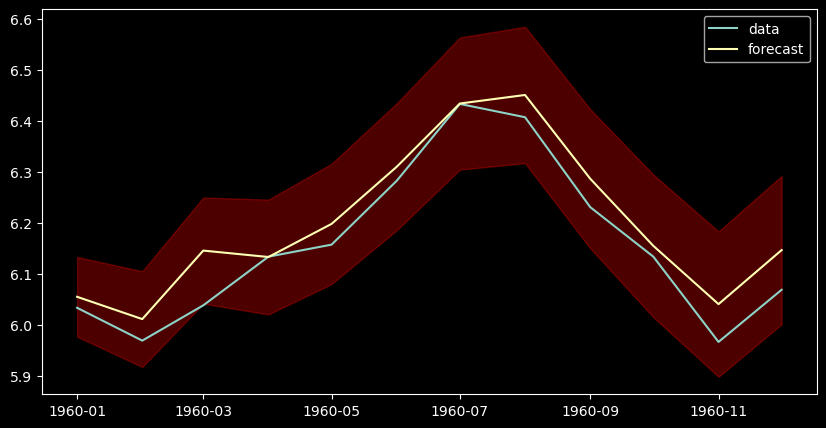

In [252]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

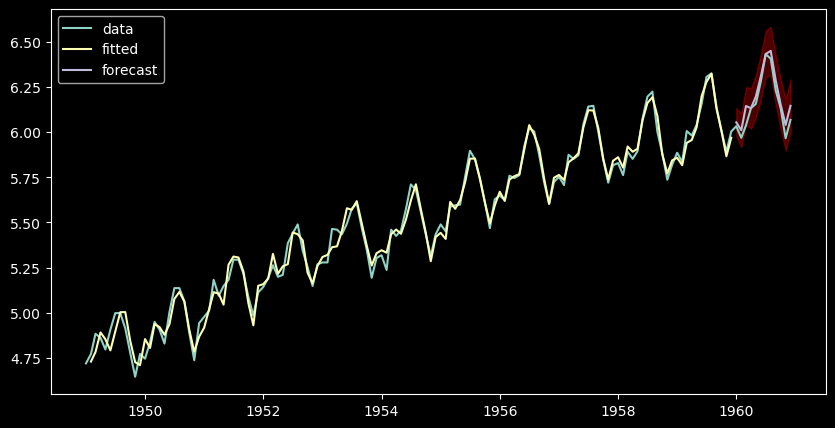

In [253]:
train_pred = model.predict_in_sample(start=1, end=-1)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,confint[:, 0], confint[:, 1], color='red', alpha=0.3)
ax.legend()

In [254]:
rmse(test['Passengers'],np.exp(test_pred))

24.207671357677288

In [255]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [256]:
goog = df[df['Name'] == 'GOOG']['Close']

In [257]:
goog

Date
2010-01-04     312.204773
2010-01-05     310.829926
2010-01-06     302.994293
2010-01-07     295.940735
2010-01-08     299.885956
                 ...     
2018-12-21     979.539978
2018-12-24     976.219971
2018-12-26    1039.459961
2018-12-27    1043.880005
2018-12-28    1037.079956
Name: Close, Length: 2263, dtype: float64

In [258]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [259]:
model = pm.auto_arima(train, error_action='ignore', trace=True, 
                      suppress_warnings=True, maxiter=10, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16270.771, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16268.077, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.935, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16268.277, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=16264.983, Time=0.28 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=16266.925, Time=0.35 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16268.907, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=16265.470, Time=0.13 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 3.167 seconds


In [260]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2233
Model:               SARIMAX(3, 1, 0)   Log Likelihood               -8127.491
Date:                Fri, 28 Mar 2025   AIC                          16264.983
Time:                        15:08:43   BIC                          16293.536
Sample:                             0   HQIC                         16275.409
                               - 2233                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3104      0.198      1.571      0.116      -0.077       0.698
ar.L1          0.0378      0.012      3.152      0.002       0.014       0.061
ar.L2         -0.0410      0.013     -3.241      0.001      -0.066      -0.016
ar.L3          0.0488      0.012      4.031      0.000       0.025       0.073
sigma2        85.1623      1.033     82.421      0.000      83.137      87.187
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11790.07
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.78   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [261]:
model.get_params()

{'maxiter': 10,
 'method': 'lbfgs',
 'order': (3, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 0),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [262]:
def plot_result(model, fulldata, train, test):
    params = model.get_params()
    d = params['order'][1]

    train_pred = model.predict_in_sample(start=d, end=-1)
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(fulldata.index, fulldata, label='data')
    ax.plot(train.index[d:], train_pred, label='fitted')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)

    ax.legend();



c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


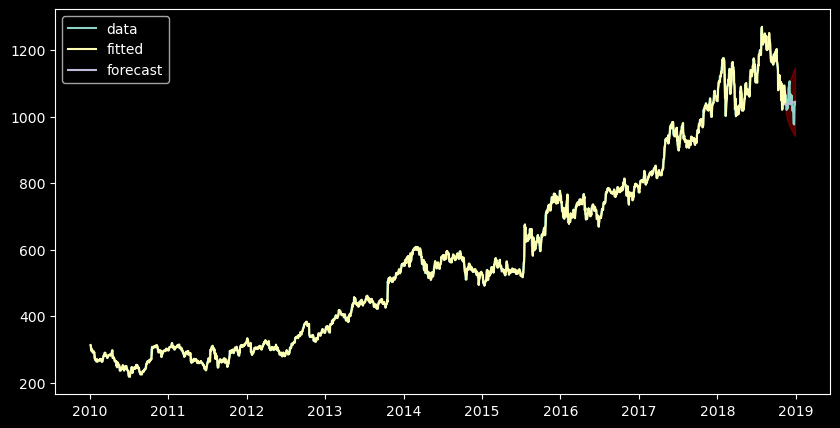

In [263]:
plot_result(model, goog, train, test)

In [264]:
test.index = pd.to_datetime(test.index) 
def plot_test(model, test):
    test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(test.index, test, label='true')
    ax.plot(test.index, test_pred, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
    ax.legend()

c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


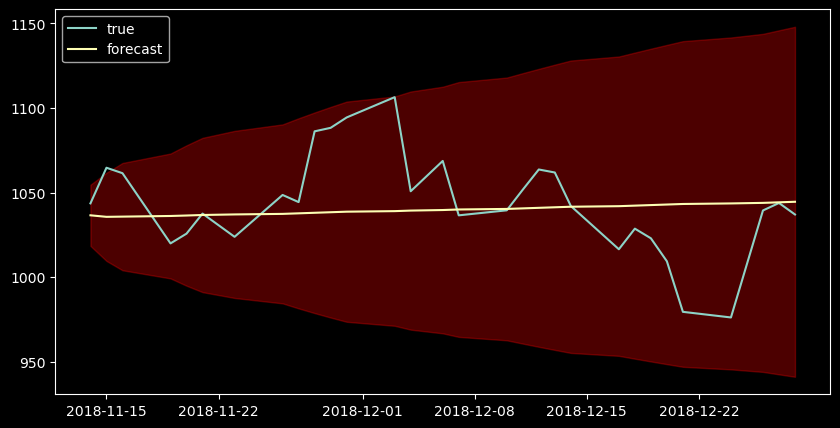

In [265]:
plot_test(model, test)

In [266]:
def rsme(y, t):
    return np.sqrt(np.mean((t-y) ** 2))

In [267]:
y_pred = model.predict(n_periods=Ntest)
error = rmse(test.values, y_pred)
print(f"RMSE: {error:.4f}")

c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\baps\anaconda3\envs\quant\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE: 30.4366


In [268]:
df = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [269]:
goog = df[df['Name'] == 'GOOG'][['Close']].copy()

In [270]:
def log_ret(price):
    log_price = np.log(price)
    return log_price.diff()

In [271]:
goog['LogRet'] = log_ret(goog['Close'])

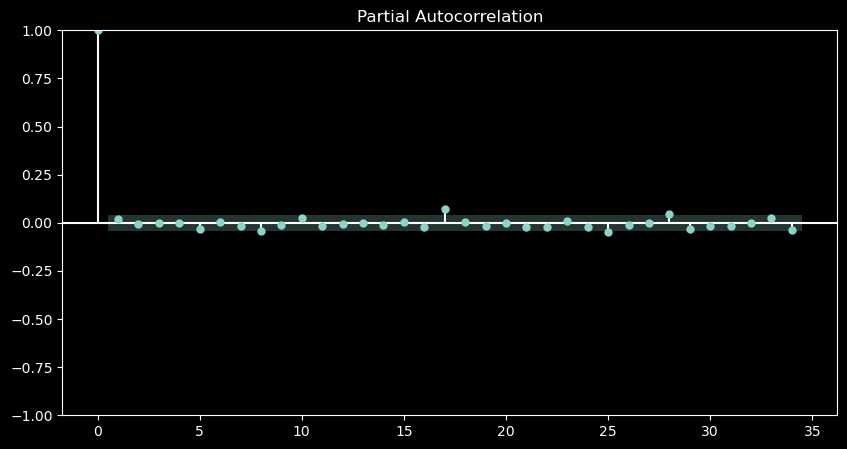

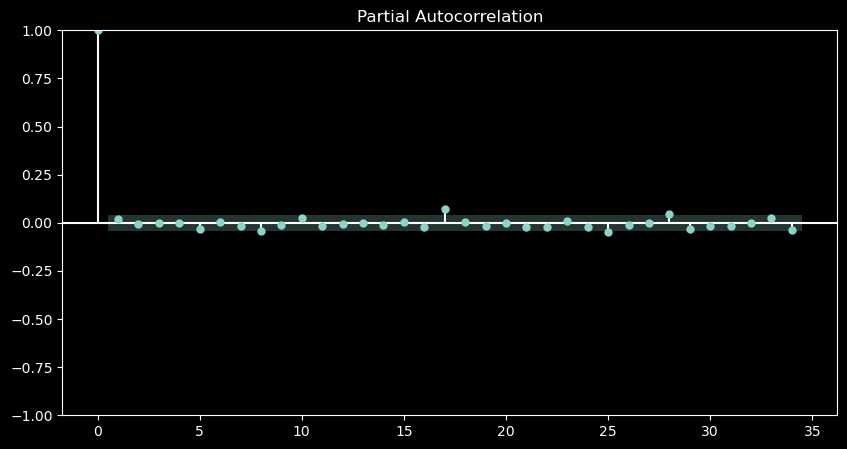

In [272]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(goog['LogRet'].dropna(), ax=ax)

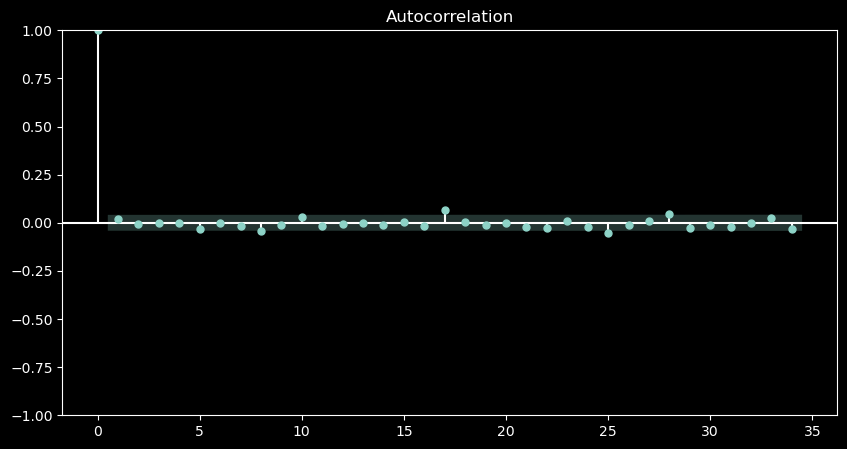

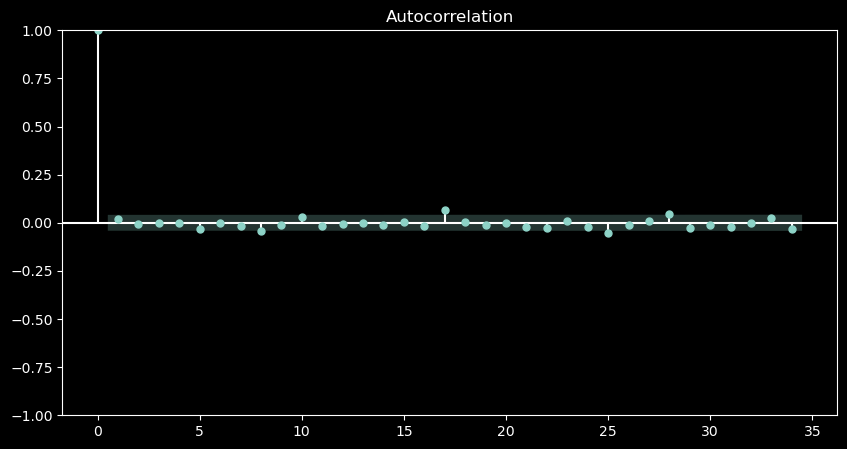

In [273]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(goog['LogRet'].dropna(), ax=ax)

In [274]:
aapl = df[df['Name'] == 'AAPL'][['Close']].copy()

In [275]:
aapl['LogRet'] = log_ret(aapl['Close'])

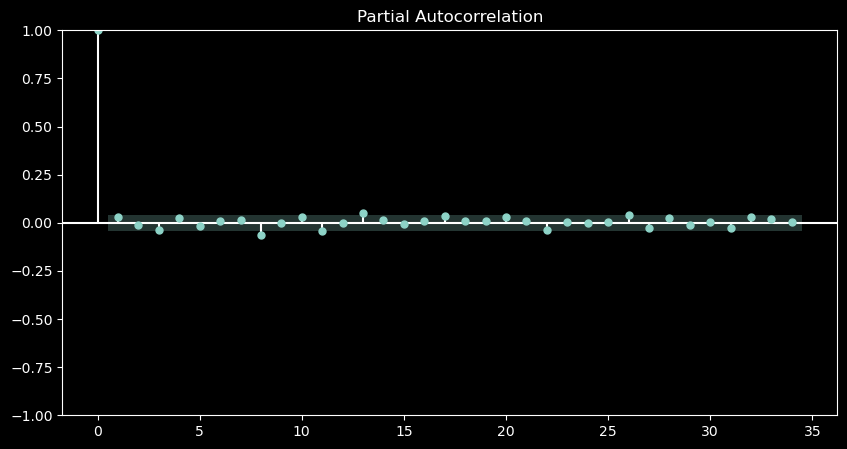

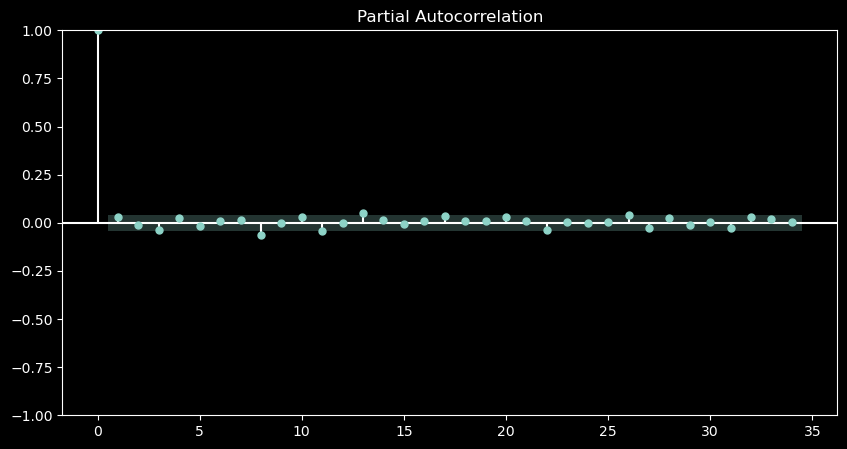

In [276]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(aapl['LogRet'].dropna(), ax=ax)

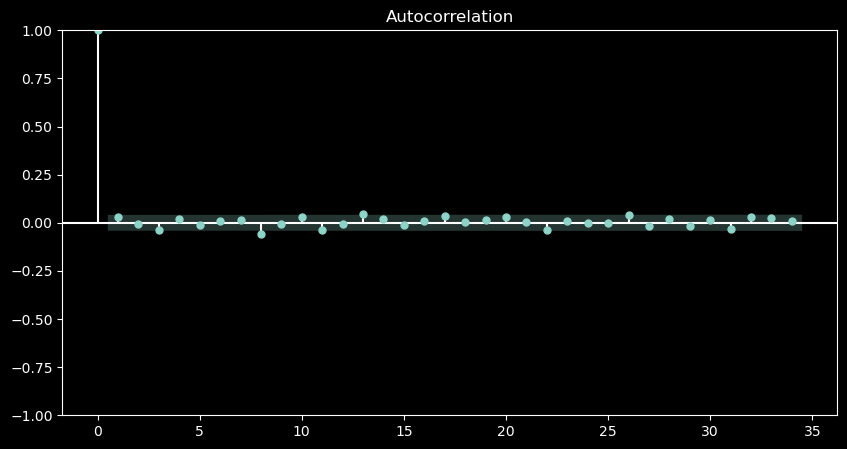

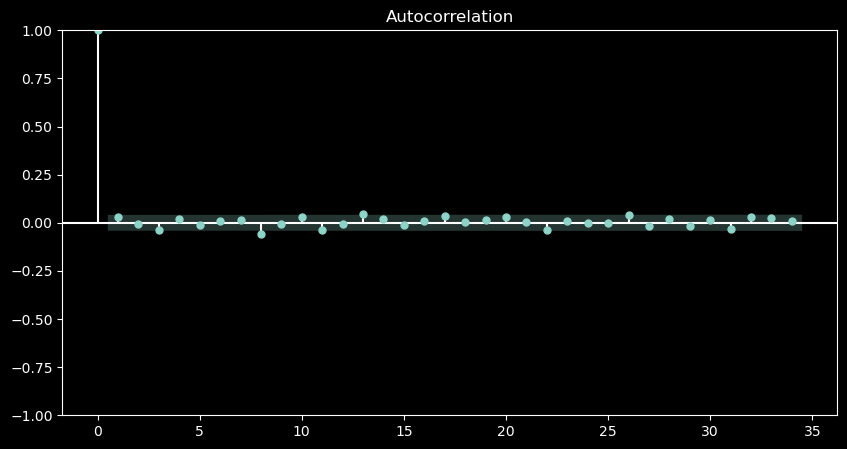

In [277]:
fig, ax = plt.subplots(figsize=(10,5))
plot_acf(aapl['LogRet'].dropna(), ax=ax)

In [278]:
sbux = df[df['Name'] == 'SBUX'][['Close']].copy()

In [279]:
sbux['LogRet'] = log_ret(sbux['Close'])

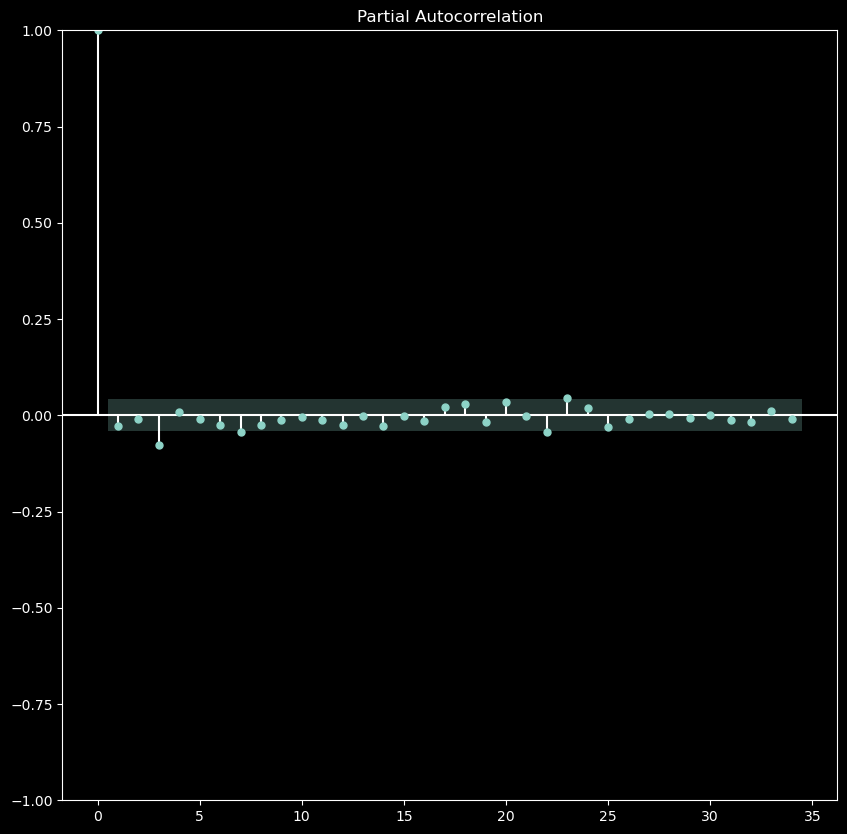

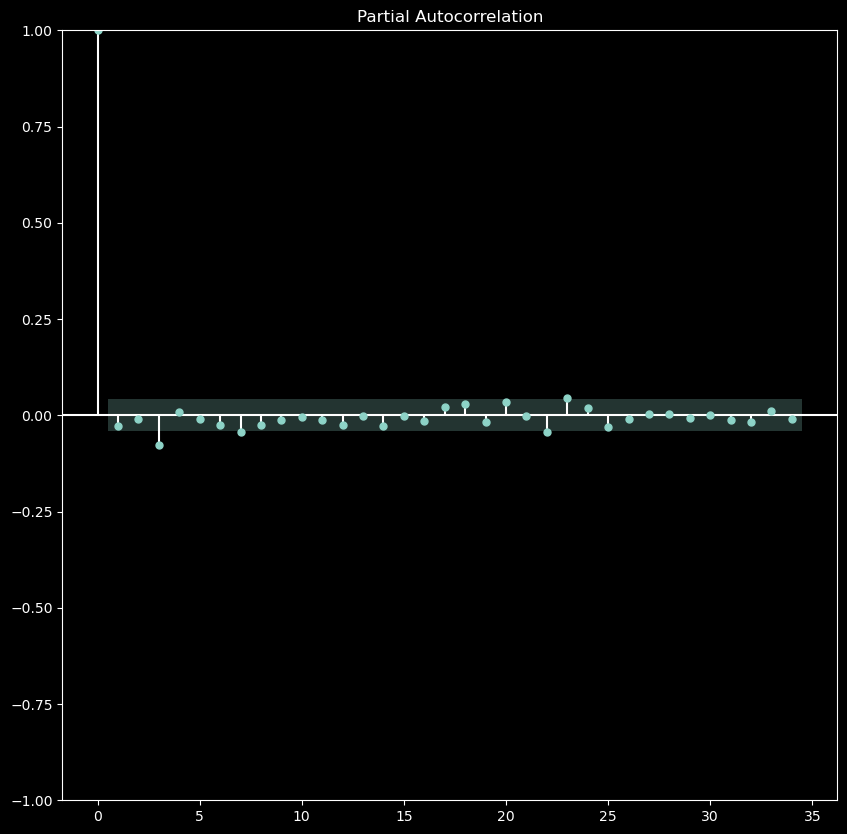

In [280]:
fig, ax = plt.subplots(figsize=(10,10))
plot_pacf(sbux['LogRet'].dropna(), ax=ax)

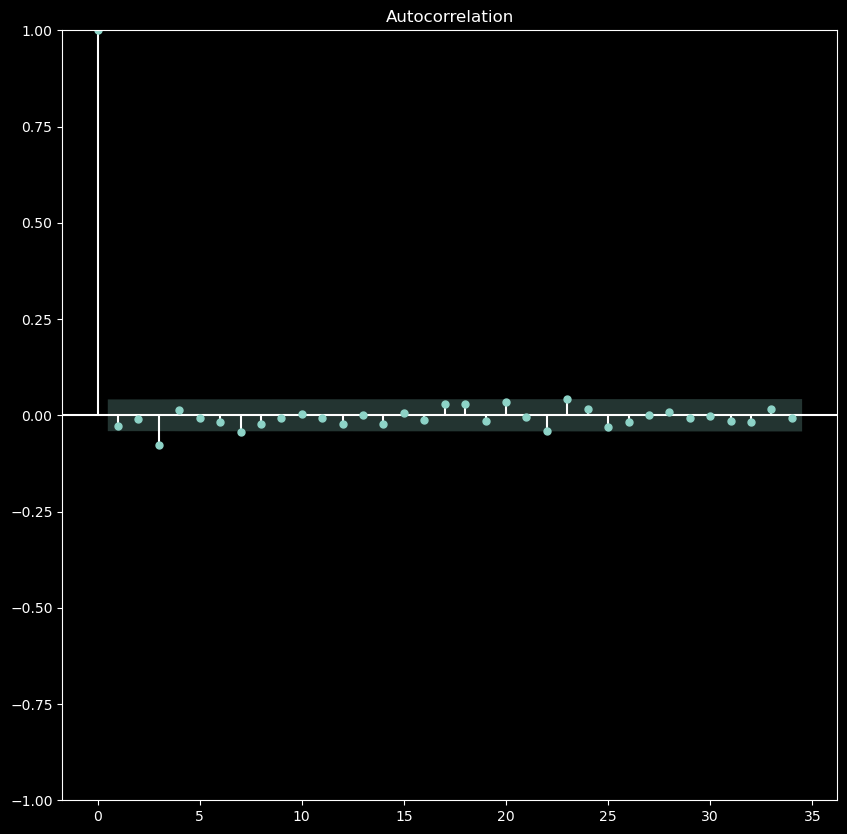

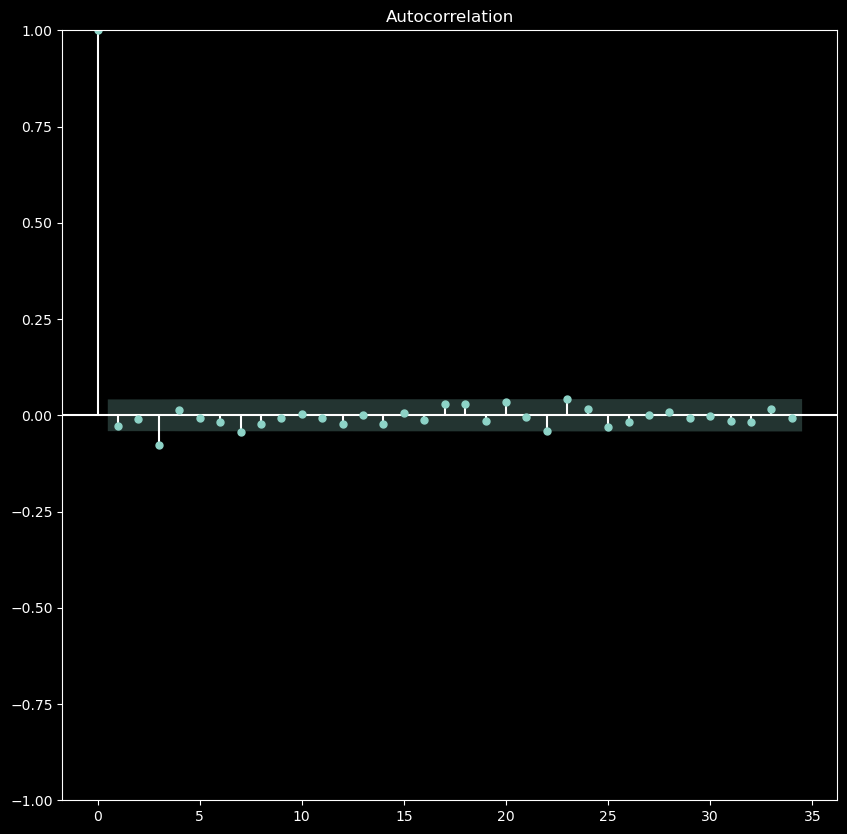

In [281]:
fig, ax = plt.subplots(figsize=(10,10))
plot_acf(sbux['LogRet'].dropna(), ax=ax)

 Stock Portfolio

In [282]:
np.random.seed(11111111)

In [285]:
mean_return = 0.01 * np.random.randn(2)
mean_return

array([0.00712955, 0.0104177 ])

In [287]:
roh = 0.01 * np.random.randn()
roh

-0.007393410606471953

In [289]:
sigmas = np.exp(np.random.randn(2))
sigmas

array([8.10298827, 0.132161  ])

In [290]:
cov = np.diag(sigmas**2)

In [293]:
sigma12 = sigmas[0] * sigmas[1] * roh
cov[0,1] = sigma12
cov[1,0] = sigma12
cov

array([[ 6.56584189e+01, -7.91759642e-03],
       [-7.91759642e-03,  1.74665306e-02]])

In [294]:
def softmax(w):
    a = np.exp(w)
    return a / a.sum()

In [296]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)

for i in range(N):
    w = softmax(np.random.randn(2))
    ret = mean_return.dot(w)
    risk = np.sqrt(w.dot(cov).dot(w))
    returns[i] = ret
    risks[i] = risk

Text(0, 0.5, 'Return')

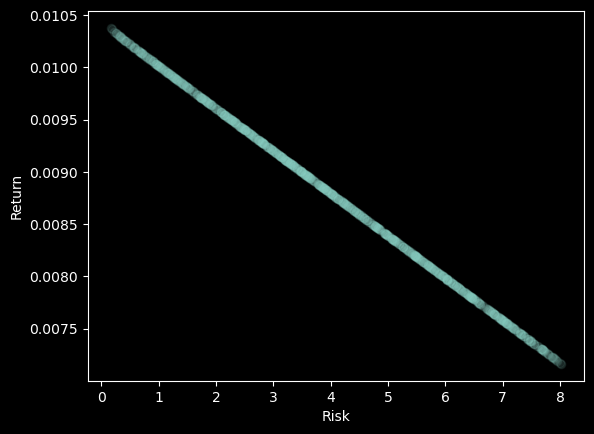

In [297]:
plt.scatter(risks, returns, alpha=0.1)
plt.xlabel('Risk')
plt.ylabel('Return')

In [300]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)

for i in range(N):
    x = np.random.random()
    w = np.array([x, 1-x])
    ret = mean_return.dot(w)
    risk = np.sqrt(w.dot(cov).dot(w))
    returns[i] = ret
    risks[i] = risk

Text(0, 0.5, 'Return')

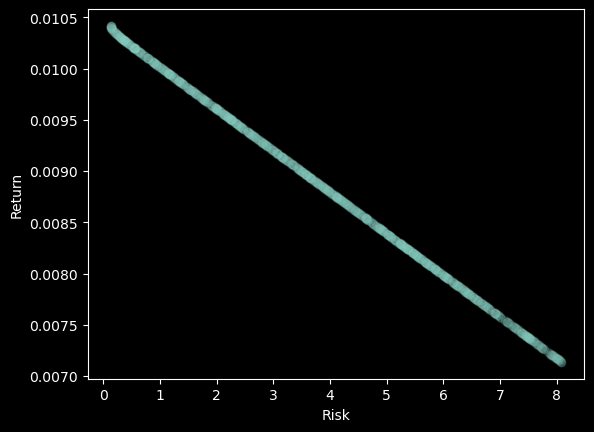

In [301]:
plt.scatter(risks, returns, alpha=0.1)
plt.xlabel('Risk')
plt.ylabel('Return')

In [304]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)

for i in range(N):
    x = np.random.random() - 0.5
    w = np.array([x, 1-x])
    ret = mean_return.dot(w)
    risk = np.sqrt(w.dot(cov).dot(w))
    returns[i] = ret
    risks[i] = risk

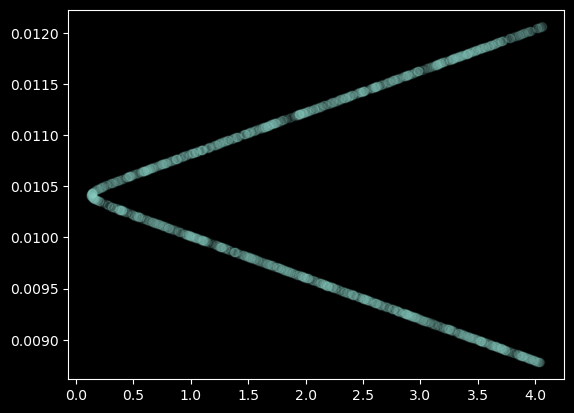

In [305]:
plt.scatter(risks, returns, alpha=0.1)